### Se realiza la autenticación y manipulación de Archivos de Google Drive utilizando API de Google y Pandas

##### Pasos para consegir la credencial

* Crear un proyecto en Google Cloud:

* Ve a Google Cloud Console.
* Inicia sesión con tu cuenta de Google.
* Crea un nuevo proyecto.
* Habilitar la API de Google Drive:

En la sección API y Servicios > Biblioteca, busca y habilita Google Drive API para tu proyecto.
* Crear una cuenta de servicio:

* Dirígete a API y Servicios > Credenciales.
* Selecciona crear credenciales > Cuenta de servicio.
* Llena el nombre, ID y descripción de la cuenta de servicio.
* Generar el archivo JSON de claves privadas:

Luego de crear la cuenta de servicio, selecciona Administrar claves.

* Haz clic en Agregar clave > Crear nueva clave.
* Elige el formato JSON. Se descargará automáticamente un archivo JSON que contiene:
* La clave privada.
* El correo de la cuenta de servicio.
* Otros datos necesarios para la autenticación.

In [ ]:
from google.oauth2.service_account import Credentials #para autenticarse en Google Drive utilizando una cuenta de servicio
from googleapiclient.discovery import build #permite interactuar con las API de Google
from googleapiclient.http import MediaIoBaseDownload #proporciona herramientas para manejar las solicitudes HTTP
import io 
import pandas as pd 

# Se define scopes necesarios, se otorga a la aplicación el permiso para leer archivos de Google Drive
SCOPES = ['https://www.googleapis.com/auth/drive']

# Cargar las credenciales de la cuenta de servicio
creds = Credentials.from_service_account_file('C:/Users/tu direccion al archivo de credenciales.json', scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=creds)

# ID del archivo en Google Drive
file_id = '1NxLsEtVmZOjFGbyAnMkNoHxgRCvdeFg7'

# Se Descarga el archivo como .xlsx
request = drive_service.files().get_media(fileId=file_id)
fh = io.BytesIO()
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print(f"Download {int(status.progress() * 100)}%.")

fh.seek(0) 
df = pd.read_excel(fh)  




Download 100%.


* Luego de extraer los datos hacemos una primera exploración

In [181]:
df.head(3)# Mostrar los primeros registros

,respondent_id,collector_id,date_created,date_modified,Unnamed: 4,email_address,first_name,last_name,custom_1,"¿Qué tan probable es que recomiendes Enferexpress a tus amigos, compañeros de trabajo o familiares?",¿Qué cambios tendría que hacer esta empresa para mejorar el servicio que recibiste?,¿Qué debería mejorar esta empresa para que le dieras una calificación más alta?,"¿Qué hace bien esta empresa, porqué la recomendarías?",¿Qué edad tienes?,Unnamed: 14,Unnamed: 15,Unnamed: 16,¿En qué barrio vives actualmente?,¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?,¿Tienes obra social?,Unnamed: 20,¿Cuál es el motivo por el que teniendo obra social prefieres solicitar nuestro servicio?,¿Cómo nos conociste?,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,Response,Open-Ended Response,Open-Ended Response,Open-Ended Response,Entre 18 y 30 años,Entre 30 y 40 años,Entre 40 y 50 años,Más de 50 años,Open-Ended Response,Open-Ended Response,Si,No,Open-Ended Response,Recomendación de conocidos,Por una farmacia,Por redes sociales,Otro (especifique)
1,1.147302e+11,432007479.0,2024-11-06 15:32:38,2024-11-06 15:34:17,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,"Atención, puntualidad, calidad humana",NaN,NaN,Entre 40 y 50 años,NaN,General paz,Colocación de inyectable,NaN,No,NaN,NaN,Por una farmacia,NaN,NaN
2,1.147286e+11,432007479.0,2024-11-04 19:12:44,2024-11-04 23:39:39,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,Humanidad,NaN,NaN,NaN,Más de 50 años,Cofico,Alergia,NaN,No,NaN,NaN,Por una farmacia,NaN,NaN


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 26 columns):
 #   Column                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                --------------  -----         
 0   respondent_id                                                                                         131 non-null    float64       
 1   collector_id                                                                                          131 non-null    float64       
 2   date_created                                                                                          131 non-null    datetime64[ns]
 3   date_modified                                                                                         131 non-null    datetime64[ns]
 4   Unnamed: 4                                                    

In [183]:
df.describe()

,respondent_id,collector_id,date_created,date_modified,Unnamed: 4,email_address,first_name,last_name,custom_1
count,1.310000e+02,131.0,131,131,0.0,0.0,0.0,0.0,0.0
mean,1.146874e+11,432007479.0,2024-09-11 21:20:35.442748160,2024-09-11 21:25:16.931297536,NaN,NaN,NaN,NaN,NaN
min,1.146455e+11,432007479.0,2024-07-16 15:34:45,2024-07-16 15:36:01,NaN,NaN,NaN,NaN,NaN
25%,1.146670e+11,432007479.0,2024-08-15 15:45:17.500000,2024-08-15 15:47:40.500000,NaN,NaN,NaN,NaN,NaN
50%,1.146856e+11,432007479.0,2024-09-10 17:07:35,2024-09-10 17:08:51,NaN,NaN,NaN,NaN,NaN
75%,1.147054e+11,432007479.0,2024-10-05 12:30:39,2024-10-05 12:34:09,NaN,NaN,NaN,NaN,NaN
max,1.147302e+11,432007479.0,2024-11-06 15:32:38,2024-11-06 15:34:17,NaN,NaN,NaN,NaN,NaN
std,2.158931e+07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'Unnamed: 4', 'email_address', 'first_name', 'last_name', 'custom_1',
       ' ¿Qué tan probable es que recomiendes Enferexpress a tus amigos, compañeros de trabajo o familiares?',
       '¿Qué cambios tendría que hacer esta empresa para mejorar el servicio que recibiste?',
       '¿Qué debería mejorar esta empresa para que le dieras una calificación más alta?',
       '¿Qué hace bien esta empresa, porqué la recomendarías?',
       '¿Qué edad tienes?', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       '¿En qué barrio vives actualmente?',
       '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?',
       '¿Tienes obra social?', 'Unnamed: 20',
       '¿Cuál es el motivo por el que teniendo obra social prefieres solicitar nuestro servicio?',
       '¿Cómo nos conociste?', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

### Empezamos a aplicar la estrategia de modularizar en pequeños data frames

* Con el objetivo de lograr el cálculo del net promoter score (medida de satisfacción del cliente) se eligen las columnas a tratar

### 1) Primer df

In [185]:
Df_Nps = df.copy()

In [186]:
Df_Nps.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'Unnamed: 4', 'email_address', 'first_name', 'last_name', 'custom_1',
       ' ¿Qué tan probable es que recomiendes Enferexpress a tus amigos, compañeros de trabajo o familiares?',
       '¿Qué cambios tendría que hacer esta empresa para mejorar el servicio que recibiste?',
       '¿Qué debería mejorar esta empresa para que le dieras una calificación más alta?',
       '¿Qué hace bien esta empresa, porqué la recomendarías?',
       '¿Qué edad tienes?', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       '¿En qué barrio vives actualmente?',
       '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?',
       '¿Tienes obra social?', 'Unnamed: 20',
       '¿Cuál es el motivo por el que teniendo obra social prefieres solicitar nuestro servicio?',
       '¿Cómo nos conociste?', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

* Se renombran las columnas elegidas que contienen los datos relevantes para el cálculo del NPS

In [187]:
Df_Nps.rename(columns={
    ' ¿Qué tan probable es que recomiendes Enferexpress a tus amigos, compañeros de trabajo o familiares?': 'NPS',
    '¿Qué cambios tendría que hacer esta empresa para mejorar el servicio que recibiste?': 'Detractores',
    '¿Qué debería mejorar esta empresa para que le dieras una calificación más alta?': 'Pasivos',
    '¿Qué hace bien esta empresa, porqué la recomendarías?': 'Promotores'
}, inplace=True)


In [188]:
Df_Nps.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'Unnamed: 4', 'email_address', 'first_name', 'last_name', 'custom_1',
       'NPS', 'Detractores', 'Pasivos', 'Promotores', '¿Qué edad tienes?',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       '¿En qué barrio vives actualmente?',
       '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?',
       '¿Tienes obra social?', 'Unnamed: 20',
       '¿Cuál es el motivo por el que teniendo obra social prefieres solicitar nuestro servicio?',
       '¿Cómo nos conociste?', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

* ELimianos aquellas columnas que por el momento están de más

In [189]:
# Eliminar las columnas especificadas
Df_Nps = Df_Nps.drop(columns=[
    'respondent_id', 'collector_id', 'date_created', 'date_modified','email_address', 'first_name', 'last_name', 'custom_1',
    '¿Qué edad tienes?', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
    '¿En qué barrio vives actualmente?',
    '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?',
    '¿Tienes obra social?', 'Unnamed: 20',
    '¿Cuál es el motivo por el que teniendo obra social prefieres solicitar nuestro servicio?',
    '¿Cómo nos conociste?', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'
])



In [190]:
Df_Nps.columns

Index(['Unnamed: 4', 'NPS', 'Detractores', 'Pasivos', 'Promotores'], dtype='object')

In [191]:
Df_Nps.head(5)

,Unnamed: 4,NPS,Detractores,Pasivos,Promotores
0,NaN,Response,Open-Ended Response,Open-Ended Response,Open-Ended Response
1,NaN,10,NaN,NaN,"Atención, puntualidad, calidad humana"
2,NaN,10,NaN,NaN,Humanidad
3,NaN,10,NaN,NaN,X la humanidad
4,NaN,10,NaN,NaN,"Muy buena atención, muy poco tiempo de espera ..."


* Reviso que el tipo de dato de la columna NPS me permita operar 

In [192]:
Df_Nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 4   0 non-null      float64
 1   NPS          132 non-null    object 
 2   Detractores  1 non-null      object 
 3   Pasivos      8 non-null      object 
 4   Promotores   125 non-null    object 
dtypes: float64(1), object(4)
memory usage: 5.3+ KB


* Mis datos son tipo object, los tansformo al tipo de dato necesario para operar

In [193]:
# Convertir la columna NPS a tipo float, ignorando errores en caso de valores no convertibles

Df_Nps['NPS'] = pd.to_numeric(Df_Nps['NPS'], errors ='coerce') # Si hay valores que no se pueden convertir pasan a ser Nan -> errors='coerce'.


In [194]:
#Revisamos el cambio de tipo de dato
Df_Nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 4   0 non-null      float64
 1   NPS          131 non-null    float64
 2   Detractores  1 non-null      object 
 3   Pasivos      8 non-null      object 
 4   Promotores   125 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.3+ KB


* La primer fila no posee datos relvantes por la forma en que se exporto el excel original, la eliminamos

In [195]:
# Eliminar la primera fila (índice 0) de Df_Nps
Df_Nps = Df_Nps.drop(0).reset_index(drop=True)


In [196]:
Df_Nps.head(3)

,Unnamed: 4,NPS,Detractores,Pasivos,Promotores
0,NaN,10.0,NaN,NaN,"Atención, puntualidad, calidad humana"
1,NaN,10.0,NaN,NaN,Humanidad
2,NaN,10.0,NaN,NaN,X la humanidad


* visualizo datos nulos

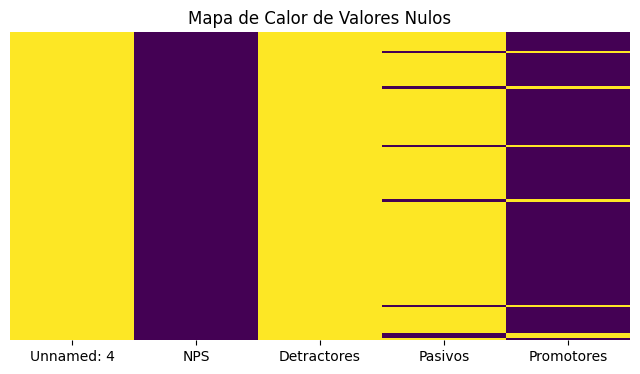

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar los nulos y graficar
plt.figure(figsize=(8, 4))
sns.heatmap(Df_Nps.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa de Calor de Valores Nulos")
plt.show()


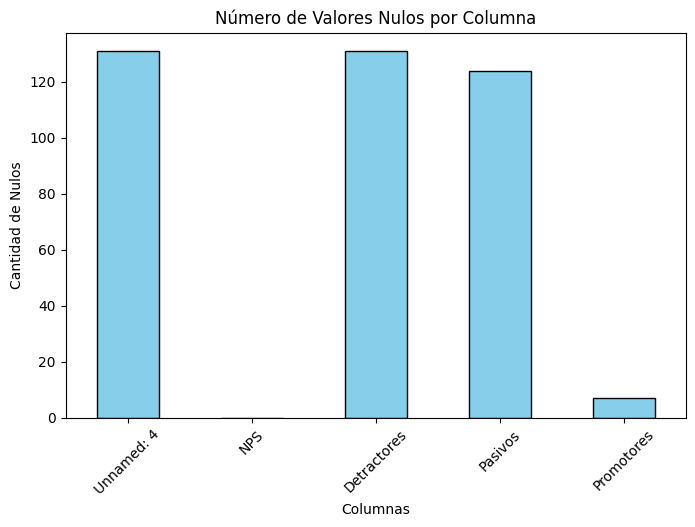

In [198]:
# Calcular los valores nulos por columna
nulos = Df_Nps.isnull().sum()

# Graficar
plt.figure(figsize=(8, 5))
nulos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Número de Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Nulos")
plt.xticks(rotation=45)
plt.show()


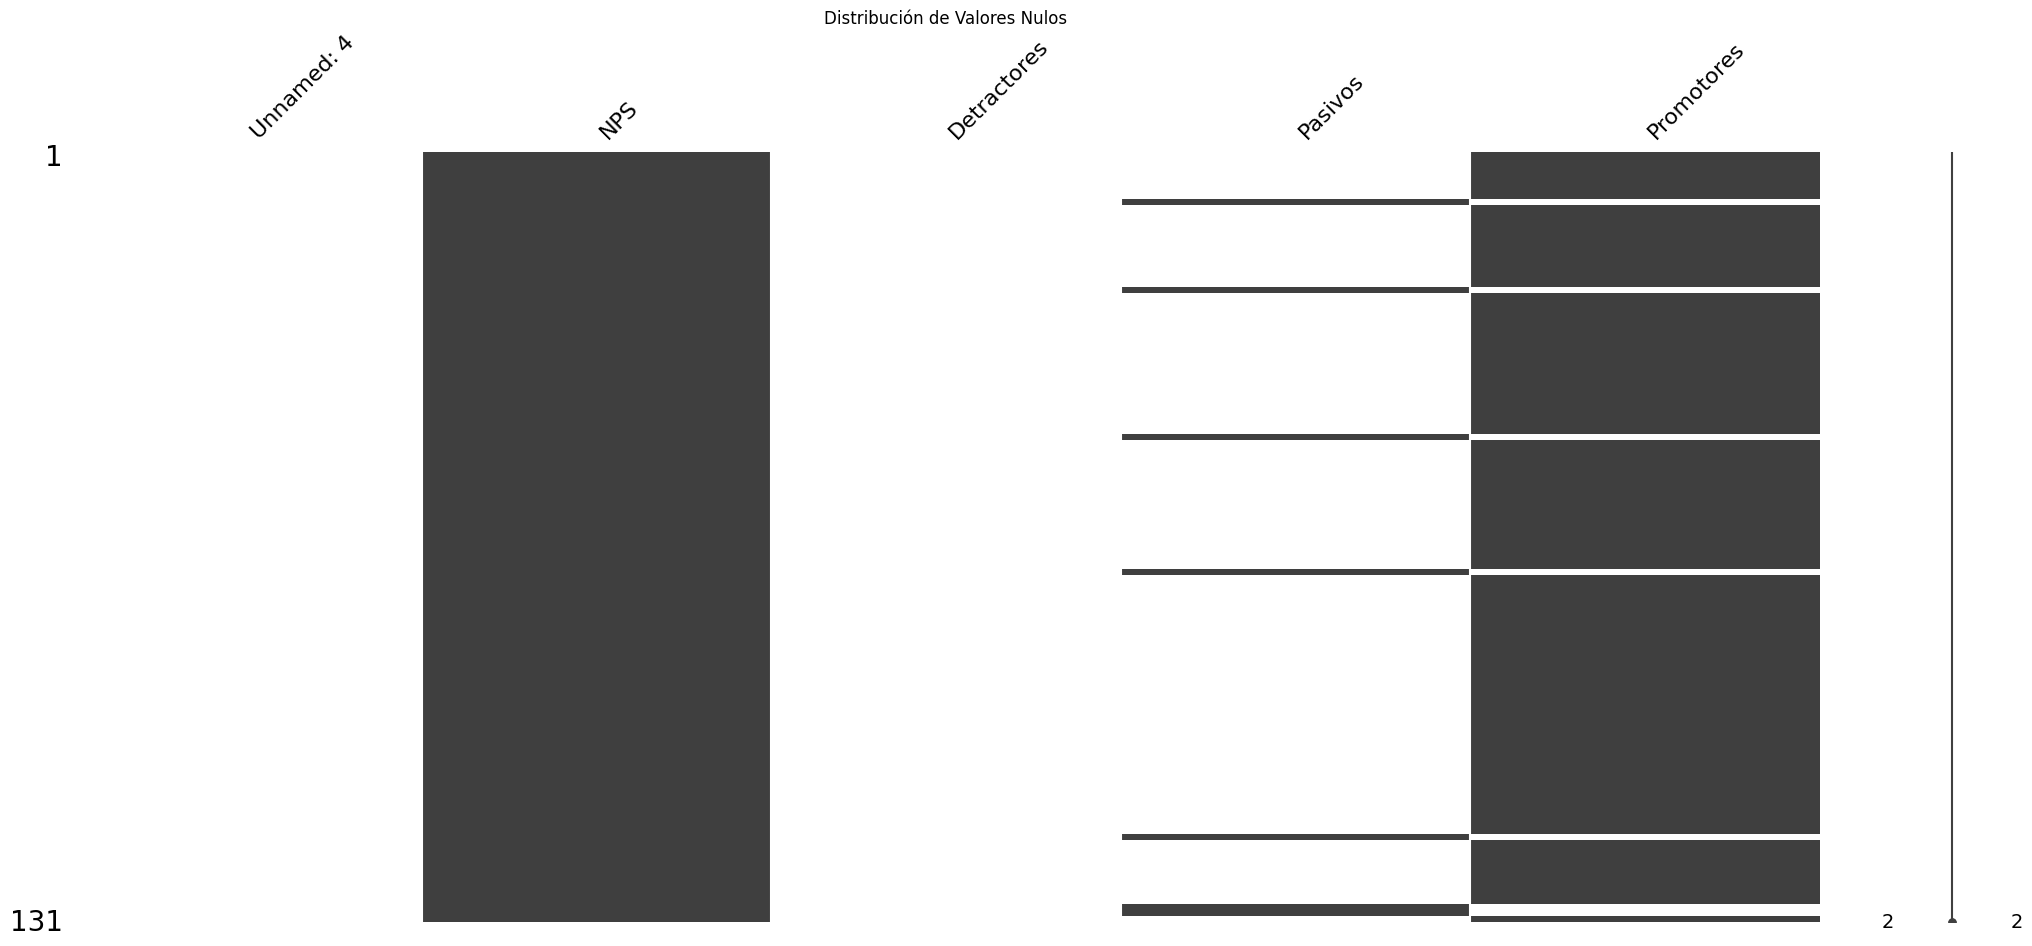

In [199]:
import missingno as msno

# Visualizar un diagrama de valores nulos
msno.matrix(Df_Nps)
plt.title("Distribución de Valores Nulos")
plt.show()



In [200]:
# Contar la cantidad de valores nulos en la columna NPS
nulos = Df_Nps['NPS'].isnull().sum()

# Contar la cantidad de ceros en la columna NPS
ceros = (Df_Nps['NPS'] == 0).sum()

# Mostrar los resultados
print(f"Cantidad de valores nulos en NPS: {nulos}")
print(f"Cantidad de ceros en NPS: {ceros}")


Cantidad de valores nulos en NPS: 0
Cantidad de ceros en NPS: 0


* Creo una funcion para clasificar en Detractores, Pasivos y Promotores, para aplicar a la columna NPS

In [201]:
# 1. Crear la columna "Clasificación" basada en los valores de NPS
def clasificar_nps(nps_score):
    if 0 <= nps_score <= 6:
        return "Detractor"
    elif 7 <= nps_score <= 8:
        return "Pasivo"
    elif 9 <= nps_score <= 10:
        return "Promotor"
    else:
        return "Sin clasificar"

Df_Nps['Clasificación'] = Df_Nps['NPS'].apply(clasificar_nps)

* El excel recibido tenia datos ingresados a modo de prueba con letras repetidas solo con el motivo de llenar rapido los campos, estas se eliminan

In [202]:
# 2. Crear una nueva columna "Texto_Válido" que indique si el comentario cumple con las condiciones
def es_texto_valido(texto):
    if pd.isna(texto):  # Si el valor es NaN
        return False
    elif len(texto) <= 4:  # Si la longitud es menor o igual a 4
        return False
    elif len(set(texto.lower())) == 1:  # Si todos los caracteres son iguales, como "gggg" o "hh"
        return False
    return True

In [203]:
# Crear la columna "Texto_Válido" para cada una de las columnas de comentarios y combinar en una única columna final
Df_Nps['Texto_Válido'] = Df_Nps.apply(
    lambda row: (
        es_texto_valido(row['Detractores']) or
        es_texto_valido(row['Pasivos']) or
        es_texto_valido(row['Promotores'])
    ), axis=1
)

In [204]:
Df_Nps

,Unnamed: 4,NPS,Detractores,Pasivos,Promotores,Clasificación,Texto_Válido
0,NaN,10.0,NaN,NaN,"Atención, puntualidad, calidad humana",Promotor,True
1,NaN,10.0,NaN,NaN,Humanidad,Promotor,True
2,NaN,10.0,NaN,NaN,X la humanidad,Promotor,True
3,NaN,10.0,NaN,NaN,"Muy buena atención, muy poco tiempo de espera ...",Promotor,True
4,NaN,9.0,NaN,NaN,Ajklifas y esmero Negativo no reciben ninguna...,Promotor,True
5,NaN,10.0,NaN,NaN,"Pronta respuesta, atentos y muy eficientes. Co...",Promotor,True
6,NaN,10.0,NaN,NaN,"Excelente servicio,amabilidad, puntualidad",Promotor,True
7,NaN,10.0,NaN,NaN,"Puntualidad, profesionalismo",Promotor,True
8,NaN,7.0,NaN,Gggg,NaN,Pasivo,False
9,NaN,10.0,NaN,NaN,Son puntuales y es variado todo lo que trabaja...,Promotor,True


* Dejamos solo aquellas filas que cumplen con la condicion de tener mas de 4 letras

In [205]:
# Filtrar el DataFrame para mantener solo las filas donde Texto_Válido es True
Df_Nps = Df_Nps[Df_Nps['Texto_Válido']]

In [206]:
# Reiniciar el índice del DataFrame después de eliminar las filas
Df_Nps = Df_Nps.reset_index(drop=True)

In [207]:
Df_Nps

,Unnamed: 4,NPS,Detractores,Pasivos,Promotores,Clasificación,Texto_Válido
0,NaN,10.0,NaN,NaN,"Atención, puntualidad, calidad humana",Promotor,True
1,NaN,10.0,NaN,NaN,Humanidad,Promotor,True
2,NaN,10.0,NaN,NaN,X la humanidad,Promotor,True
3,NaN,10.0,NaN,NaN,"Muy buena atención, muy poco tiempo de espera ...",Promotor,True
4,NaN,9.0,NaN,NaN,Ajklifas y esmero Negativo no reciben ninguna...,Promotor,True
5,NaN,10.0,NaN,NaN,"Pronta respuesta, atentos y muy eficientes. Co...",Promotor,True
6,NaN,10.0,NaN,NaN,"Excelente servicio,amabilidad, puntualidad",Promotor,True
7,NaN,10.0,NaN,NaN,"Puntualidad, profesionalismo",Promotor,True
8,NaN,10.0,NaN,NaN,Son puntuales y es variado todo lo que trabaja...,Promotor,True
9,NaN,10.0,NaN,NaN,Excelente atencion,Promotor,True


In [208]:
# Clasificar las respuestas basadas en la columna 'NPS'
Df_Nps['Clasificación'] = Df_Nps['NPS'].apply(
    lambda x: 'Detractor' if x <= 6 else 'Pasivo' if x <= 8 else 'Promotor'
)

# Contar la cantidad de Promotores, Detractores y Pasivos
conteo_clasificacion = Df_Nps['Clasificación'].value_counts()

# Obtener el número de promotores y detractores
num_promotores = conteo_clasificacion.get('Promotor', 0)
num_detractores = conteo_clasificacion.get('Detractor', 0)

# Calcular el total de respuestas
total_respuestas = len(Df_Nps)

# Validar que hay respuestas
if total_respuestas == 0:
    print("No hay respuestas para calcular el NPS.")
else:
    # Calcular el NPS
    nps_score = ((num_promotores - num_detractores) / total_respuestas) * 100
    nps_score_redondeado = round(nps_score)
    print(f"El Net Promoter Score (NPS) es: {nps_score_redondeado}")

El Net Promoter Score (NPS) es: 97


In [209]:
# Contar la frecuencia de cada valor en la columna 'NPS'
conteo_nps = Df_Nps['NPS'].value_counts().sort_index()

# Mostrar el resultado
print(conteo_nps)


NPS
8.0       4
9.0       9
10.0    111
Name: count, dtype: int64


* Exportamos los datos de NPS

In [ ]:
import gspread
from google.oauth2.service_account import Credentials


# Definir los scopes necesarios
SCOPES = ['https://www.googleapis.com/auth/drive']

# Cargar las credenciales de la cuenta de servicio
creds = Credentials.from_service_account_file('C:/Users/tu direccion al archivo de credenciales.json', scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=creds)

# Autorizar el cliente
client = gspread.authorize(creds)

In [ ]:
# Abrir la hoja de cálculo (usa la URL o el ID) 

spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1TT9clnbdDTfFjDrI1O3f74Mb3LqWVFJX_W_We7Flxrk/edit?usp=sharing') 

In [212]:
# Seleccionar la hoja específica (Sheet2)
worksheet = spreadsheet.worksheet("Nps2git")

In [213]:
from gspread_dataframe import set_with_dataframe

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, Df_Nps)

try:
    set_with_dataframe(worksheet, DF4)
    print("Datos exportados exitosamente a Google Sheets.")
except Exception as e:
    print(f"Error al exportar datos: {e}")

Datos exportados exitosamente a Google Sheets.


### 2) Creamos 3 dataframes para cada categoria de NPS
* Con el objetivo de analizar nubes de palabra por separado

### Se crea el df detractores

In [214]:
# Filtrar el DataFrame original para incluir solo las filas donde la clasificación es "Detractor"
Df_Detractores = Df_Nps[Df_Nps['Clasificación'] == 'Detractor'][['NPS', 'Detractores', 'Clasificación']]

# Visualizar el nuevo DataFrame
print(Df_Detractores)



Empty DataFrame
Columns: [NPS, Detractores, Clasificación]
Index: []


In [215]:
Df_Detractores

,NPS,Detractores,Clasificación


### Se crea el df pasivos

In [216]:
# Filtrar el DataFrame original para incluir solo las filas donde la clasificación es "Pasivo"
Df_Pasivos = Df_Nps[Df_Nps['Clasificación'] == 'Pasivo'][['NPS', 'Pasivos', 'Clasificación']]

# Visualizar el nuevo DataFrame
print(Df_Pasivos)


     NPS                                            Pasivos Clasificación
22   8.0  Ubicación del lugar clara de la sede y certifi...        Pasivo
47   8.0                                     Mada, es bueno        Pasivo
70   8.0                   Preguntar x se coloca la vacuna?        Pasivo
113  8.0                Que habrían la vacuna en frente mio        Pasivo


### Se crea el df Promotor

In [217]:
# Filtrar el DataFrame original para incluir solo las filas donde la clasificación es "Promotor"
Df_Promotor = Df_Nps[Df_Nps['Clasificación'] == 'Promotor'][['NPS', 'Promotores', 'Clasificación']]

# Visualizar el nuevo DataFrame
print(Df_Promotor)


      NPS                                         Promotores Clasificación
0    10.0             Atención, puntualidad, calidad humana       Promotor
1    10.0                                         Humanidad       Promotor
2    10.0                                    X la humanidad       Promotor
3    10.0  Muy buena atención, muy poco tiempo de espera ...      Promotor
4     9.0  Ajklifas y esmero  Negativo no reciben ninguna...      Promotor
5    10.0  Pronta respuesta, atentos y muy eficientes. Co...      Promotor
6    10.0         Excelente servicio,amabilidad, puntualidad      Promotor
7    10.0                       Puntualidad, profesionalismo      Promotor
8    10.0  Son puntuales y es variado todo lo que trabaja...      Promotor
9    10.0                                 Excelente atencion      Promotor
10   10.0                Rápido y bien el trabajo solicitado      Promotor
11   10.0  Servicio, predisposición,  atención , amabilid...      Promotor
12   10.0                

### Exportamos cada DF nuevo como pestañas en excel

In [218]:
Df_Nps.tail(15)

,Unnamed: 4,NPS,Detractores,Pasivos,Promotores,Clasificación,Texto_Válido
109,NaN,10.0,NaN,NaN,Por ser muy profesionales y seridad,Promotor,True
110,NaN,10.0,NaN,NaN,"Buena atención, profesionalismo, respeto al pa...",Promotor,True
111,NaN,10.0,NaN,NaN,"Responsabilidad, cordialidad, respeto",Promotor,True
112,NaN,10.0,NaN,NaN,"Todo muy bien , pedí el turno ,llegaron en el ...",Promotor,True
113,NaN,8.0,NaN,Que habrían la vacuna en frente mio,NaN,Pasivo,True
114,NaN,10.0,NaN,NaN,La recomendaría porque tiene atención en el dí...,Promotor,True
115,NaN,10.0,NaN,NaN,"Resuelven situaciones imprevistas, siempre con...",Promotor,True
116,NaN,10.0,NaN,NaN,El compromiso y eficacia con su labor.,Promotor,True
117,NaN,9.0,NaN,NaN,El buen trato hacia el adulto.mayor.,Promotor,True
118,NaN,10.0,NaN,NaN,El profesionalismo en la atención.,Promotor,True


In [219]:
Df_Nps.columns

Index(['Unnamed: 4', 'NPS', 'Detractores', 'Pasivos', 'Promotores',
       'Clasificación', 'Texto_Válido'],
      dtype='object')

In [220]:
Df_Promotor.columns

Index(['NPS', 'Promotores', 'Clasificación'], dtype='object')

In [221]:
Df_Detractores.columns

Index(['NPS', 'Detractores', 'Clasificación'], dtype='object')

### 3) Generamos el NET Promoter Score

In [222]:
# Clasificar las respuestas basadas en la columna 'NPS'
Df_Nps['Clasificación'] = Df_Nps['NPS'].apply(
    lambda x: 'Detractor' if x <= 6 else 'Pasivo' if x <= 8 else 'Promotor'
)

# Contar la cantidad de Promotores, Detractores y Pasivos
conteo_clasificacion = Df_Nps['Clasificación'].value_counts()

# Obtener el número de promotores y detractores
num_promotores = conteo_clasificacion.get('Promotor', 0)
num_detractores = conteo_clasificacion.get('Detractor', 0)

# Calcular el total de respuestas
total_respuestas = len(Df_Nps)

# Validar que hay respuestas
if total_respuestas == 0:
    print("No hay respuestas para calcular el NPS.")
else:
    # Calcular el NPS
    nps_score = ((num_promotores - num_detractores) / total_respuestas) * 100
    nps_score_redondeado = round(nps_score)
    print(f"El Net Promoter Score (NPS) es: {nps_score_redondeado}")




El Net Promoter Score (NPS) es: 97


* Exporto Promotores a la pestaña de googlesheets NpsPromo

In [ ]:
# Abrir la hoja de cálculo (usa la URL o el ID) 

spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1TT9clnbdDTfFjDrI1O3f74Mb3LqWVFJX_W_We7Flxrk/edit?usp=sharing')  

In [224]:
# Seleccionar la primera hoja (worksheet)
worksheet = spreadsheet.worksheet("NpsPromo")  # O puedes seleccionar otra hoja

In [225]:
from gspread_dataframe import set_with_dataframe

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, Df_Promotor)

try:
    set_with_dataframe(worksheet, DF4)
    print("Datos exportados exitosamente a Google Sheets.")
except Exception as e:
    print(f"Error al exportar datos: {e}")

Datos exportados exitosamente a Google Sheets.


* Exporto Pasivos a la pestaña de googlesheets NpsPasiv

In [ ]:
# Abrir la hoja de cálculo (usa la URL o el ID) 

spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1TT9clnbdDTfFjDrI1O3f74Mb3LqWVFJX_W_We7Flxrk/edit?usp=sharing')  

# Seleccionar la primera hoja (worksheet)
worksheet = spreadsheet.worksheet("NpsPasiv")  # O puedes seleccionar otra hoja

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, Df_Pasivos)

try:
    set_with_dataframe(worksheet, DF4)
    print("Datos exportados exitosamente a Google Sheets.")
except Exception as e:
    print(f"Error al exportar datos: {e}")



Datos exportados exitosamente a Google Sheets.


* Exporto Detractores a la pestaña de googlesheets NpsDetra

In [227]:
Df_Detractores

,NPS,Detractores,Clasificación


In [ ]:
# Abrir la hoja de cálculo (usa la URL o el ID) 

spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1TT9clnbdDTfFjDrI1O3f74Mb3LqWVFJX_W_We7Flxrk/edit?usp=sharing')   

# Seleccionar la primera hoja (worksheet)
worksheet = spreadsheet.worksheet("NpsDetra")  # O puedes seleccionar otra hoja

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, Df_Detractores)

### 3) Pasamos al analisis de comentarios por dataframe


In [229]:
Df_Promotor.head(2)

,NPS,Promotores,Clasificación
0,10.0,"Atención, puntualidad, calidad humana",Promotor
1,10.0,Humanidad,Promotor


### Frecuencia de palabras por data frame


* Se convierte los comentarios de la columna de interes en una lista y se une las frases.
* Se Tokeniza y limpia las palabras usando SpaCy.
* Se Lematiza las palabras.
* Se calcula las frecuencias de las palabras lematizadas.
* Filtramos las palabras que se repiten más de 2 veces y las ordena por frecuencia.
* Se crea un DataFrame con las frecuencias.
* Se define una función de color personalizada para la nube de palabras.
* Se crea y muestra la nube de palabras usando las frecuencias calculadas.

### 3.A) Frecuencia de promotores

                 Frecuencia
atención                 40
puntualidad              16
calidad                   9
humano                    6
humanidad                 2
buen                     22
tiempo                    3
esperar                   2
excelente                22
enfermero                 8
confiable                 1
ajklifa                   1
esmero                    1
negativo                  1
recibir                   1
ninguno                   2
obra                      1
social                    1
prontar                   3
respuesta                10
atento                    4
eficiente                 8
mucho                     3
calidez                   4
servicio                 12
amabilidad                9
profesionalismo           6
puntual                  11
variado                   1
trabajar                  3
responsable               4
atencion                  3
rápido                   12
bien                      7
trabajo             

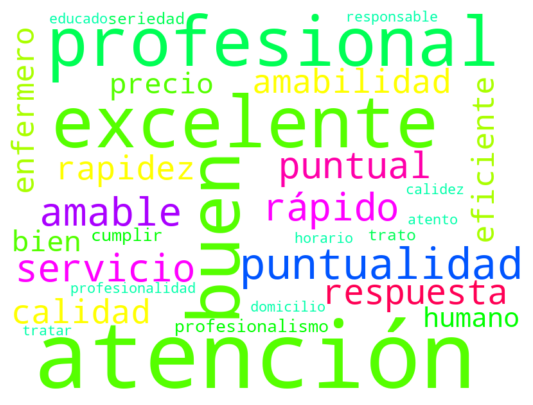

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter

# Cargar modelo de SpaCy para español
nlp = spacy.load('es_core_news_sm')

# Convertir los comentarios de la columna 'Promotores' en una lista y unir las frases
frasespr = Df_Promotor['Promotores'].dropna().tolist()
frases_unidaspr = " ".join(frasespr)

# Tokenización y limpieza con SpaCy
doc = nlp(frases_unidaspr)
tokenspr = [token.text.lower() for token in doc if not token.is_punct and not token.is_digit and len(token.text) >= 3]
tokenspr = [token for token in tokenspr if token not in stopwords.words('spanish')]

# Lematizar las palabras
lemmatized_tokens_Pr = [token.lemma_ for token in nlp(" ".join(tokenspr))]

# Calcular frecuencias
frecuencia_lema_Pr = FreqDist(lemmatized_tokens_Pr)

# Filtrar palabras que se repiten más de 2 veces
frecuencia_filtrada_Pr = {k: v for k, v in frecuencia_lema_Pr.items() if v > 3}
frecuencia_ordenada_Pr = sorted(frecuencia_filtrada_Pr.items(), key=lambda x: x[1], reverse=True)

# Crear un DataFrame para las frecuencias
df_frecuencia_Prom = pd.DataFrame.from_dict(frecuencia_lema_Pr, orient="index", columns=["Frecuencia"])
print(df_frecuencia_Prom)

# Definir una función de color personalizada
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    frequency = diccionario_frecuencia_Pr[word]
    if frequency <= 3:
        hue = 180 + int((frequency - 1) * 20)  # Verde agua a verde
        return f"hsl({hue}, 100%, 70%)"
    elif frequency <= 9:
        hue = 180 - int((frequency - 3) * 20)  # Celestes y azules
        return f"hsl({hue}, 100%, 50%)"
    else:
        hue = int(360 - (frequency - 9) * 20) % 360  # Rojizos
        return f"hsl({hue}, 100%, 50%)"

# Crear y mostrar la nube de palabras
diccionario_frecuencia_Pr = dict(frecuencia_ordenada_Pr)
nube_palabras = WordCloud(width=800, height=600, background_color="white", color_func=color_func).generate_from_frequencies(diccionario_frecuencia_Pr)

plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation="bilinear")
plt.axis("off")
plt.show()


* EXPORTAMOS LA FRENCUENCIA DE PROMOTORES

In [231]:
# Crear un DataFrame para las frecuencias
df_frecuencia_Promotores = pd.DataFrame(frecuencia_ordenada_Pr, columns=['Palabra', 'Frecuencia'])
print(df_frecuencia_Promotores)

            Palabra  Frecuencia
0          atención          40
1              buen          22
2         excelente          22
3       profesional          20
4       puntualidad          16
5            amable          13
6          servicio          12
7            rápido          12
8           puntual          11
9         respuesta          10
10          calidad           9
11       amabilidad           9
12          rapidez           9
13        enfermero           8
14        eficiente           8
15             bien           7
16           precio           7
17           humano           6
18  profesionalismo           6
19          cumplir           6
20         seriedad           5
21            trato           5
22           atento           4
23          calidez           4
24      responsable           4
25  profesionalidad           4
26          educado           4
27          horario           4
28           tratar           4
29        domicilio           4


In [ ]:
# Abrir la hoja de cálculo (usa la URL o el ID) 

spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1TT9clnbdDTfFjDrI1O3f74Mb3LqWVFJX_W_We7Flxrk/edit?usp=sharing')   

In [233]:
# Seleccionar la hoja específica (Sheet2)
worksheet = spreadsheet.worksheet("frecPro")

In [234]:
from gspread_dataframe import set_with_dataframe

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, df_frecuencia_Promotores)

In [235]:
Df_Pasivos.head(2)

,NPS,Pasivos,Clasificación
22,8.0,Ubicación del lugar clara de la sede y certifi...,Pasivo
47,8.0,"Mada, es bueno",Pasivo


### 3.b) Calculamos frecuencia de pasivos

In [236]:
#Importaciones ya realizadas

# Cargar modelo de SpaCy para español
nlp = spacy.load('es_core_news_sm')

# Convertir los comentarios de la columna 'Promotores' en una lista y unir las frases
frasesPas = Df_Pasivos['Pasivos'].dropna().tolist()
frases_unidaspas = " ".join(frasesPas)

# Tokenización y limpieza con SpaCy
doc2 = nlp(frases_unidaspas)
tokensPas = [token.text.lower() for token in doc2 if not token.is_punct and not token.is_digit and len(token.text) >= 3]
tokensPas = [token for token in tokensPas if token not in stopwords.words('spanish')]

# Lematizar las palabras
lemmatized_tokens_Pas = [token.lemma_ for token in nlp(" ".join(tokensPas))]

# Calcular frecuencias
frecuencia_lema_Pas = FreqDist(lemmatized_tokens_Pas)

# Filtrar palabras que se repiten más de 2 veces
frecuencia_filtrada_Pas = {k: v for k, v in frecuencia_lema_Pas.items() if v > 3}
frecuencia_ordenada_Pas = sorted(frecuencia_filtrada_Pas.items(), key=lambda x: x[1], reverse=True)

# Crear un DataFrame para las frecuencias
df_frecuencia_Pasiv = pd.DataFrame.from_dict(frecuencia_lema_Pas, orient="index", columns=["Frecuencia"])
print(df_frecuencia_Pasiv)

# Definir una función de color personalizada
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    frequency = diccionario_frecuencia_Pasiv[word]
    if frequency <= 3:
        hue = 180 + int((frequency - 1) * 20)  # Verde agua a verde
        return f"hsl({hue}, 100%, 70%)"
    elif frequency <= 9:
        hue = 180 - int((frequency - 3) * 20)  # Celestes y azules
        return f"hsl({hue}, 100%, 50%)"
    else:
        hue = int(360 - (frequency - 9) * 20) % 360  # Rojizos
        return f"hsl({hue}, 100%, 50%)"

# Verificar si hay palabras suficientes para generar la nube de palabras
diccionario_frecuencia_Pasiv = dict(frecuencia_ordenada_Pas)
if len(diccionario_frecuencia_Pasiv) > 0:
    # Crear y mostrar la nube de palabras
    nube_palabras2 = WordCloud(width=800, height=600, background_color="white", color_func=color_func).generate_from_frequencies(diccionario_frecuencia_Pasiv)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(nube_palabras2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("No hay suficientes palabras para generar la nube de palabras.")


               Frecuencia
ubicación               1
lugar                   1
claro                   1
sede                    1
certificación           1
oficial                 1
bien                    1
definido                1
poder                   1
comprobar               1
sitio                   1
oficialmente            1
autorizado              1
mado                    1
bueno                   1
preguntar               1
coloco                  1
vacuna                  1
vacuno                  1
frente                  1
mio                     1
No hay suficientes palabras para generar la nube de palabras.


In [237]:
frases_unidaspas

'Ubicación del lugar clara de la sede y certificación oficial bien definida para que podamos comprobar si es un sitio oficialmente autorizado. Mada, es bueno Preguntar x se coloca la vacuna? Que habrían la vacuna en frente mio'

* Creamos un nuevo data frame para exportacion

In [238]:

# Crear un nuevo DataFrame en el formato requerido
DF_FrecuenciaPASIVO = df_frecuencia_Pasiv.reset_index()
DF_FrecuenciaPASIVO.columns = ["Palabra", "Frecuencia"]

# Mostrar el DataFrame para verificar
print(DF_FrecuenciaPASIVO)


          Palabra  Frecuencia
0       ubicación           1
1           lugar           1
2           claro           1
3            sede           1
4   certificación           1
5         oficial           1
6            bien           1
7        definido           1
8           poder           1
9       comprobar           1
10          sitio           1
11   oficialmente           1
12     autorizado           1
13           mado           1
14          bueno           1
15      preguntar           1
16         coloco           1
17         vacuna           1
18         vacuno           1
19         frente           1
20            mio           1


* exportamos la hoja de pasivos

In [239]:
# Seleccionar la hoja específica (Sheet2)
worksheet = spreadsheet.worksheet("frecPas")

In [240]:
from gspread_dataframe import set_with_dataframe

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, DF_FrecuenciaPASIVO)

### 3.C) Calculamos frecuencia de detractores

In [241]:
Df_Detractores

,NPS,Detractores,Clasificación


* Si el dataframe esta vacio verificamos y modificamos

In [242]:

# Primera parte: Evaluación y modificación del DataFrame si está vacío
if Df_Detractores.empty:
    # Asignar valores predeterminados
    Df_Detractores = pd.DataFrame({
        'NPS': [1],
        'Detractores': ['SinComentarios'],
        'Clasificación': ['Detractor']
    })

In [243]:
Df_Detractores

,NPS,Detractores,Clasificación
0,1,SinComentarios,Detractor


In [244]:

#Importaciones y modelo nlp ya cargado 

# Verificar si el DataFrame Df_Detractores está vacío y asignar valores predeterminados si es así
if Df_Detractores.empty:
    Df_Detractores = pd.DataFrame({
        'NPS': [0],
        'Detractores': ['sinpalabras'],
        'Clasificación': ['Detractor']
    })

# Convertir los comentarios de la columna 'Detractores' en una lista y unir las frases
frasesde = Df_Detractores['Detractores'].dropna().tolist()
frases_unidasde = " ".join(frasesde)

# Tokenización y limpieza con SpaCy
doc3 = nlp(frases_unidasde)
tokensde = [token.text.lower() for token in doc3 if not token.is_punct and not token.is_digit and len(token.text) >= 3]
tokensde = [token for token in tokensde if token not in stopwords.words('spanish')]

# Lematizar las palabras
lemmatized_tokens_de = [token.lemma_ for token in nlp(" ".join(tokensde))]

# Calcular frecuencias
frecuencia_lema_de = FreqDist(lemmatized_tokens_de)

# Crear DataFrame con columnas "Palabra" y "Frecuencia"
df_frecuencia_de = pd.DataFrame(frecuencia_lema_de.items(), columns=["Palabra", "Frecuencia"])

# Verificar si el DataFrame tiene palabras; si no, establecer un mensaje por defecto
if df_frecuencia_de.empty:
    df_frecuencia_de = pd.DataFrame({'Palabra': ['SinComentarios'], 'Frecuencia': [1]})  # Cambia el 0 a 1 para que aparezca en la nube
else:
    # Ordenar el DataFrame de frecuencias por "Frecuencia" en orden descendente
    df_frecuencia_de = df_frecuencia_de.sort_values(by="Frecuencia", ascending=False).reset_index(drop=True)

# Convertir el DataFrame a un diccionario para WordCloud
diccionario_frecuencia_de = dict(zip(df_frecuencia_de['Palabra'], df_frecuencia_de['Frecuencia']))
print(df_frecuencia_de)

# Definir una función de color personalizada
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    frequency = diccionario_frecuencia_de.get(word, 0)
    if frequency <= 3:
        hue = 180 + int((frequency - 1) * 20)  # Verde agua a verde
        return f"hsl({hue}, 100%, 70%)"
    elif frequency <= 9:
        hue = 180 - int((frequency - 3) * 20)  # Celestes y azules
        return f"hsl({hue}, 100%, 50%)"
    else:
        hue = int(360 - (frequency - 9) * 20) % 360  # Rojizos
        return f"hsl({hue}, 100%, 50%)"

# Verificar si hay palabras suficientes para generar la nube de palabras
if len(diccionario_frecuencia_de) > 2:
    # Crear y mostrar la nube de palabras
    nube_palabras2 = WordCloud(width=800, height=600, background_color="white", color_func=color_func).generate_from_frequencies(diccionario_frecuencia_de)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(nube_palabras2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("No hay suficientes palabras para generar la nube de palabras.")


         Palabra  Frecuencia
0  sincomentario           1
No hay suficientes palabras para generar la nube de palabras.


In [245]:
df_frecuencia_de.columns

Index(['Palabra', 'Frecuencia'], dtype='object')

* Exportamos

In [246]:
# Seleccionar la hoja específica (Sheet2)
worksheet = spreadsheet.worksheet("frecDet")

In [247]:
from gspread_dataframe import set_with_dataframe

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, df_frecuencia_de)

### 4) Métricas de ubicacion

* Recordamos el df principal

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 26 columns):
 #   Column                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                --------------  -----         
 0   respondent_id                                                                                         131 non-null    float64       
 1   collector_id                                                                                          131 non-null    float64       
 2   date_created                                                                                          131 non-null    datetime64[ns]
 3   date_modified                                                                                         131 non-null    datetime64[ns]
 4   Unnamed: 4                                                    

#### Modificamos desde DF2 agregamos columnas para edad

In [249]:
# Crear el nuevo DataFrame con solo las columnas especificadas
DF2 = df[['date_created', 'date_modified','¿En qué barrio vives actualmente?',
          '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?', '¿Cómo nos conociste?', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25','¿Qué edad tienes?','Unnamed: 14','Unnamed: 15','Unnamed: 16']]

In [250]:
df.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'Unnamed: 4', 'email_address', 'first_name', 'last_name', 'custom_1',
       ' ¿Qué tan probable es que recomiendes Enferexpress a tus amigos, compañeros de trabajo o familiares?',
       '¿Qué cambios tendría que hacer esta empresa para mejorar el servicio que recibiste?',
       '¿Qué debería mejorar esta empresa para que le dieras una calificación más alta?',
       '¿Qué hace bien esta empresa, porqué la recomendarías?',
       '¿Qué edad tienes?', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       '¿En qué barrio vives actualmente?',
       '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?',
       '¿Tienes obra social?', 'Unnamed: 20',
       '¿Cuál es el motivo por el que teniendo obra social prefieres solicitar nuestro servicio?',
       '¿Cómo nos conociste?', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

* Activo la visualizacion de todas las columas y filas en los df

In [251]:
pd.set_option('display.max_colum', None)

In [252]:
pd.set_option('display.max_rows', None)

In [253]:
DF2.columns

Index(['date_created', 'date_modified', '¿En qué barrio vives actualmente?',
       '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?',
       '¿Cómo nos conociste?', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       '¿Qué edad tienes?', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

* Visualizo el data frame para renombrar luego las colunmas

In [254]:
DF2.head(5)

,date_created,date_modified,¿En qué barrio vives actualmente?,¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?,¿Cómo nos conociste?,Unnamed: 23,Unnamed: 24,Unnamed: 25,¿Qué edad tienes?,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaT,NaT,Open-Ended Response,Open-Ended Response,Recomendación de conocidos,Por una farmacia,Por redes sociales,Otro (especifique),Entre 18 y 30 años,Entre 30 y 40 años,Entre 40 y 50 años,Más de 50 años
1,2024-11-06 15:32:38,2024-11-06 15:34:17,General paz,Colocación de inyectable,NaN,Por una farmacia,NaN,NaN,NaN,NaN,Entre 40 y 50 años,NaN
2,2024-11-04 19:12:44,2024-11-04 23:39:39,Cofico,Alergia,NaN,Por una farmacia,NaN,NaN,NaN,NaN,NaN,Más de 50 años
3,2024-11-04 19:10:46,2024-11-04 19:12:27,Cofico,Alergia,NaN,Por una farmacia,NaN,NaN,NaN,NaN,Entre 40 y 50 años,NaN
4,2024-11-02 19:12:12,2024-11-02 19:13:45,Villa Azalaiz,Inyección anticonceptiva,Recomendación de conocidos,Por una farmacia,NaN,NaN,Entre 18 y 30 años,NaN,NaN,NaN


* Renombro columna que necesito

In [255]:
DF2 = DF2.rename(columns={
    '¿Cuáles son los síntomas o afecciones por los que solicitas nuestro servicio?': 'Afeccion',
    '¿Cómo nos conociste?': 'Recomendacion',
    '¿En qué barrio vives actualmente?': 'Barrio',
    'Unnamed: 23': 'Farmacia',
    'Unnamed: 24': 'Redes',
    'Unnamed: 25': 'Otros',
    '¿Qué edad tienes?': '18a30',
    'Unnamed: 14': '30a40',
    'Unnamed: 15': '40a50',
    'Unnamed: 16': 'mas50'
})

In [256]:
pd.set_option('display.max_rows', None)
print(DF2['Barrio'])

0                       Open-Ended Response
1                              General paz 
2                                    Cofico
3                                    Cofico
4                            Villa Azalaiz 
5                                 Patricios
6                             Alta Córdoba 
7                           Barrio gral paz
8                        Cerro de las Rosas
9                                     Bvcfg
10                           Villa Cabrera 
11                            Villa retiro 
12                                Ayacucho 
13                     Altos villa cabrera 
14                   Quebrada de las rosas 
15                              Pueyrredon 
16                              San Martin 
17                            Poeta lugones
18                            Alta Córdoba 
19                            Alta Córdoba 
20                                 Zumaran 
21                              General Paz
22                             R

* Renombramos columnas

In [257]:
DF2.head(2)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50
0,NaT,NaT,Open-Ended Response,Open-Ended Response,Recomendación de conocidos,Por una farmacia,Por redes sociales,Otro (especifique),Entre 18 y 30 años,Entre 30 y 40 años,Entre 40 y 50 años,Más de 50 años
1,2024-11-06 15:32:38,2024-11-06 15:34:17,General paz,Colocación de inyectable,NaN,Por una farmacia,NaN,NaN,NaN,NaN,Entre 40 y 50 años,NaN


In [258]:
# Eliminar la fila con índice 0
DF2 = DF2.drop(index=0).reset_index(drop=True)


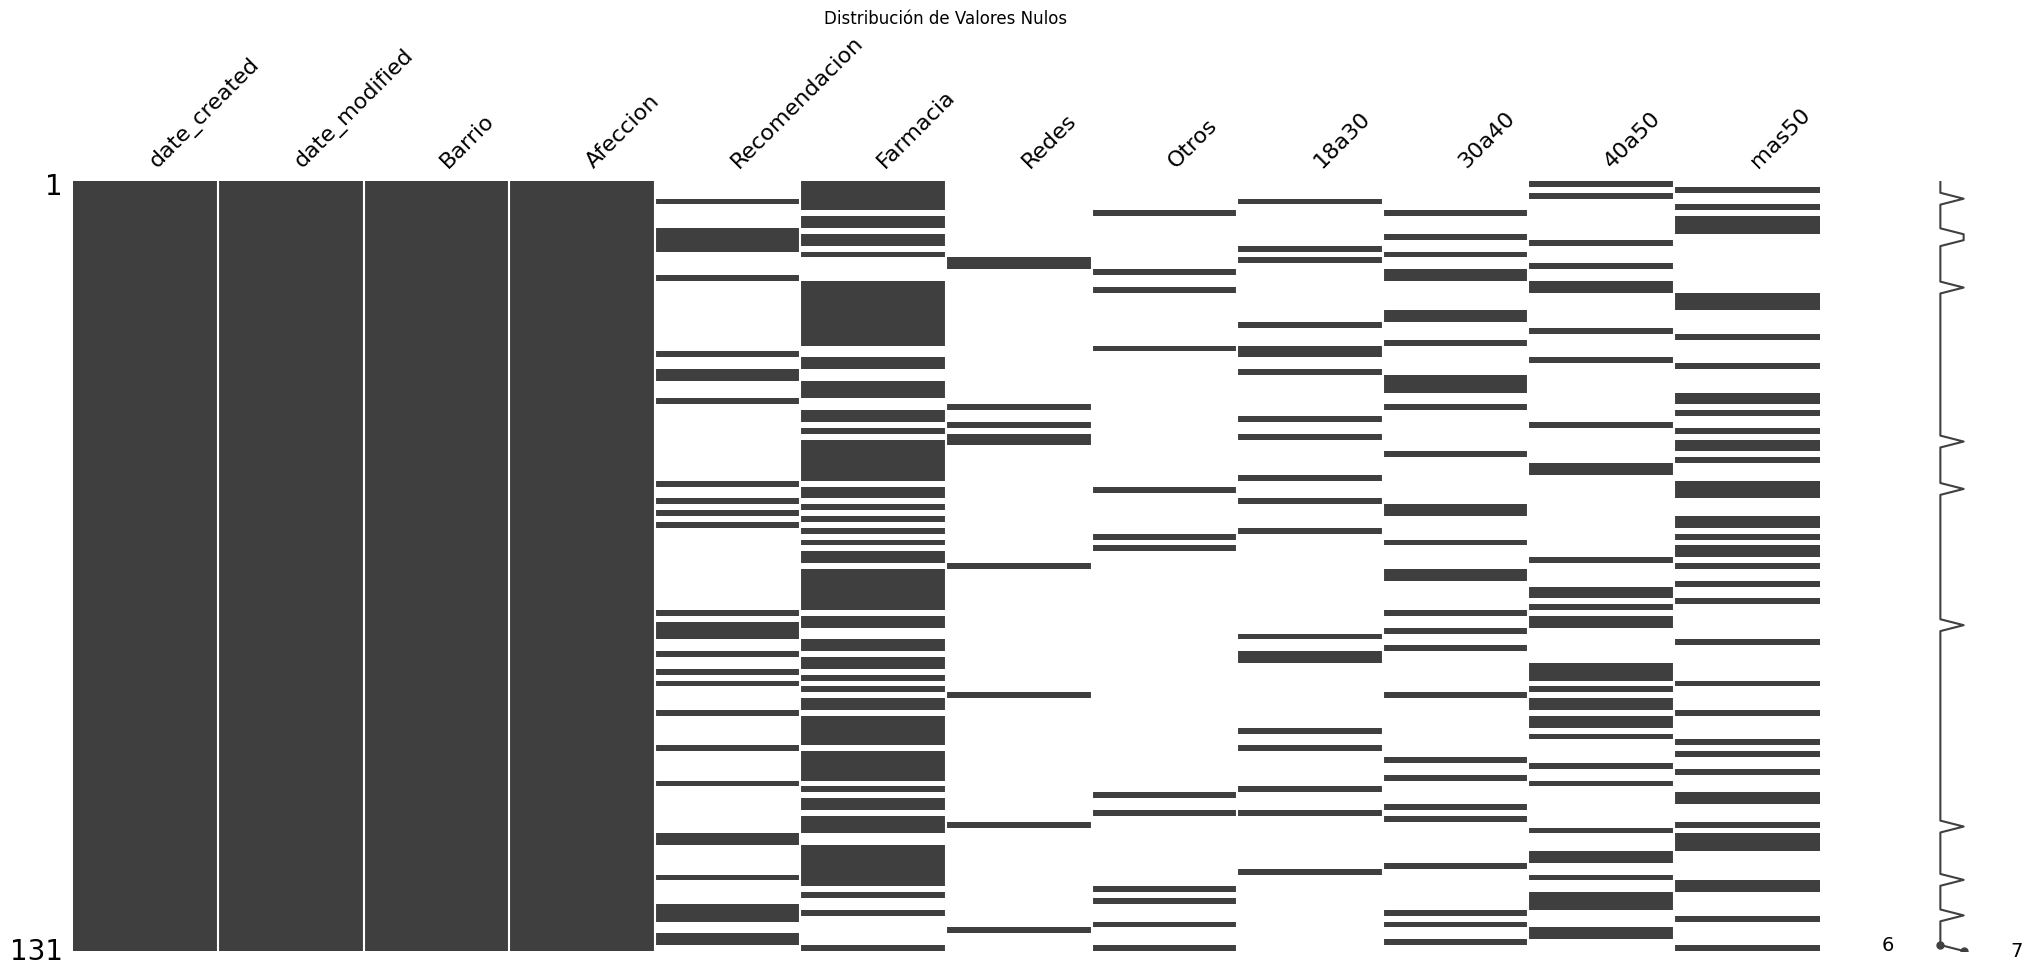

In [259]:
import missingno as msno

# Visualizar un diagrama de valores nulos
msno.matrix(DF2)
plt.title("Distribución de Valores Nulos")
plt.show()

* Tratamos la columna Barrio

In [260]:
# Eliminar filas con NaN en la columna 'Barrio'

DF2 = DF2.dropna(subset=['Barrio'])




In [261]:

# Consultar si hay valores nulos en la columna 'Barrio'
nulos_barrio = DF2['Barrio'].isnull().sum()

# Mostrar el resultado
print(f"La columna 'Barrio' tiene {nulos_barrio} valores nulos.")

La columna 'Barrio' tiene 0 valores nulos.


* Eliminamos las palabras con menos de 3 letras

In [262]:
# Filtrar el DataFrame para mantener solo las filas en las que 'Barrio' tenga más de 3 caracteres
DF2 = DF2[DF2['Barrio'].str.len() > 3]


In [ ]:

import unidecode

# Convertir a mayusculas y eliminar acentos
DF2['Barrio'] = DF2['Barrio'].str.upper().apply(lambda x: unidecode.unidecode(x))



In [264]:
pd.set_option('display.max_rows', None)
DF2['Barrio']

0                              GENERAL PAZ 
1                                    COFICO
2                                    COFICO
3                            VILLA AZALAIZ 
4                                 PATRICIOS
5                             ALTA CORDOBA 
6                           BARRIO GRAL PAZ
7                        CERRO DE LAS ROSAS
8                                     BVCFG
9                            VILLA CABRERA 
10                            VILLA RETIRO 
11                                AYACUCHO 
12                     ALTOS VILLA CABRERA 
13                   QUEBRADA DE LAS ROSAS 
14                              PUEYRREDON 
15                              SAN MARTIN 
16                            POETA LUGONES
17                            ALTA CORDOBA 
18                            ALTA CORDOBA 
19                                 ZUMARAN 
20                              GENERAL PAZ
21                             RE  AMERICA 
22                              

In [265]:
# Eliminar la fila donde el valor de la columna 'Barrio' es 'BVCFG' correspondiente a una carga de datos de prueba que no es dato valido
DF2 = DF2[DF2['Barrio'] != 'BVCFG']

In [266]:
# Convertir la columna 'Barrio' en una lista
lista_barrios = DF2['Barrio'].tolist()

# Mostrar la lista completa
print(lista_barrios)


['GENERAL PAZ ', 'COFICO', 'COFICO', 'VILLA AZALAIZ ', 'PATRICIOS', 'ALTA CORDOBA ', 'BARRIO GRAL PAZ', 'CERRO DE LAS ROSAS', 'VILLA CABRERA ', 'VILLA RETIRO ', 'AYACUCHO ', 'ALTOS VILLA CABRERA ', 'QUEBRADA DE LAS ROSAS ', 'PUEYRREDON ', 'SAN MARTIN ', 'POETA LUGONES', 'ALTA CORDOBA ', 'ALTA CORDOBA ', 'ZUMARAN ', 'GENERAL PAZ', 'RE  AMERICA ', 'ALTA CBA', 'ALTA CORDOBA ', 'ALTA CORDOBA ', 'VILLA CABRERA', 'VILLA BELGRANO ', 'TEJAS 2', 'GENERAL PAZ', 'ALTA CORDOBA', 'ALTA CORDOBA ', 'VILLA SERRANA. VILLA RIVERA INDARTE ', 'VILLA 9 DE JULIO', 'CORDOBA', 'VILLA SERRANA', 'VALLE ESCONDIDO', 'GRANJA DE FUNES ', 'DON BOSCO', 'COFICO', 'VILLA BELGRANO ', 'TALLERES OESTE ', 'RECIDENCIAL SANTA ANA ', 'ALTO GRAL PAZ', 'PATRICIOS', 'RESIDENCIAL AMERICA ', 'ALTA CBA ', 'BO.POETA LUGONES ', 'COFICO ', 'ALTA CBA', 'CENTRO', 'ALBERDI', 'JUAN B JUSTO CBA. ', 'MARQUEZ DE SOBREMONTE ', 'COFICO', 'CHATEAU', 'GENERAL PAZ', 'COFICO', 'CERRO', 'ALTA CORDOBA', 'ALTA CORDOBA', 'ALTA CBA ', 'NUEVO URCA', 'SA

* Revisamos que hay barrios escritos de diferentes formas pero hacen referencia al mismo barrio

In [267]:
# Diccionario de reemplazo para nombres comunes
reemplazos = {
    'GRAL. PAZ':'GENERAL PAZ',
    'BARRIO GRAL PAZ':'GENERAL PAZ',
    'RE  AMERICA': 'RESIDENCIAL AMERICA',
    'RE  AMERICA ': 'RESIDENCIAL AMERICA',
    'RESINDECIAL AMERICA ':'RESIDENCIAL AMERICA',
    'RESIDENCIAL AMERICA':'RESIDENCIAL AMERICA',
    'RECIDENCIAL AMERICA ':'RESIDENCIAL AMERICA',
    'RECIDENCIAL AMERICA':'RESIDENCIAL AMERICA',
    'CENTRO AMERICA ':'CENTRO AMERICA',
    'COFICO ': 'COFICO',
    'ALBERDI ': 'ALBERDI',
    'ALTA CBA': 'ALTA CORDOBA',
    'ALTA CBA ': 'ALTA CORDOBA',
    'ALTA CORDOBA ': 'ALTA CORDOBA',
    'VILLA SERRANA. VILLA RIVERA INDARTE': 'VILLA SERRANA',
    'VILLA SERRANA. VILLA RIVERA INDARTE ': 'VILLA SERRANA',
    'VILLA AZALAIS': 'VILLA AZALAIZ',
    'CORDOBA': 'ALTA CORDOBA',
    'BO.POETA LUGONES':'POETA LUGONES',
    'BO.POETA LUGONES ':'POETA LUGONES',
    'POETA':'POETA LUGONES',
    'POETA ':'POETA LUGONES',
    'JUAN B JUSTO CBA.': 'JUAN B JUSTO',
    'JUAN B JUSTO CBA. ': 'JUAN B JUSTO',
    'GRAL BUSTOS': 'GENERAL BUSTOS',
    'GRAL BUSTOS ': 'GENERAL BUSTOS',
    'GENERAL BUSTOS ': 'GENERAL BUSTOS',
    'GRAL. PAZ':'GENERAL PAZ',
    'GRAL PAZ ':'GENERAL PAZ',
    'GRAL PAZ':'GENERAL PAZ',
    'GENERAL PAZ ':'GENERAL PAZ',
    'ALTOS DE SAN MARTINHIG':'ALTOS DE SAN MARTIN',
    'GRAL. PAZ':'GENERAL PAZ',
    'GRAL. PAZ ':'GENERAL PAZ',
    'QUEBRADA DE LAS ROSAS ':'CERRO',
    'QUEBRADA DE LAS ROSAS':'CERRO',
    'CERRO DE LAS ROSAS':'CERRO',
    'GALTOS DE SAN MARTIN':'ALTOS DE SAN MARTIN',
    'STA CLARA':'SANTA CLARA',
    'SAN MARTIN ':'SAN MARTIN',
    'EL TREBOL ':'EL TREBOL',
    'MARQUEZ DE SOBREMONTE':'MARQUES DE SOBREMONTE',
    'MARQUEZ DE SOBREMONTE ':'MARQUES DE SOBREMONTE',
    'MARQUES DE SOBREMONTE ':'MARQUES DE SOBREMONTE',
    'MARQUES DE SOBEMONTE':'MARQUES DE SOBREMONTE',
    'VILLA VELGRANO':'VILLA BELGRANO',
    
    
    
    # Añadir otras variantes según sea necesario
}

# Reemplazar los valores en la columna 'Barrio'
DF2['Barrio'] = DF2['Barrio'].replace(reemplazos)

# Eliminar filas con valores irrelevantes (si existen)
DF2 = DF2[~DF2['Barrio'].str.isnumeric()]  # Elimina si hay filas con solo números

# Contabilizar la frecuencia de cada barrio
conteo_barrios = DF2['Barrio'].value_counts()

print(conteo_barrios)

Barrio
ALTA CORDOBA              25
GENERAL PAZ               10
COFICO                     9
GENERAL BUSTOS             5
CERRO                      4
POETA LUGONES              4
VILLA CABRERA              3
SAN MARTIN                 3
VILLA BELGRANO             3
LOS PARAISOS               2
PATRICIOS                  2
EL TREBOL                  2
PUEYRREDON                 2
DON BOSCO                  2
ALBERDI                    2
RESIDENCIAL AMERICA        2
VILLA RETIRO               2
CHATEAU                    2
VILLA SERRANA              2
MARQUES DE SOBREMONTE      2
SAN VICENTE                1
CHACRA DEL NORTE           1
LICEO PRIMERA SECCION      1
NUEVA CORDOBA              1
ALTAMIRA                   1
ALTO ALBEDI                1
TEJAS                      1
RIVERA INDARTE             1
LOS BOULEVARES             1
CENTRO AMERICA             1
VILLA BELGRANO             1
NATANIA 19                 1
PROCREAR LICEO             1
NUEVO POETA LUGONES        1
SANTA C

In [268]:
# Calcular la frecuencia de cada barrio
frecuencia_barrios = DF2['Barrio'].value_counts()

# Convertir la serie de frecuencias en un DataFrame
df_frecuencia_barrios = frecuencia_barrios.reset_index()
df_frecuencia_barrios.columns = ['Barrio', 'Frecuencia']



In [269]:
df_frecuencia_barrios

,Barrio,Frecuencia
0,ALTA CORDOBA,25
1,GENERAL PAZ,10
2,COFICO,9
3,GENERAL BUSTOS,5
4,CERRO,4
5,POETA LUGONES,4
6,VILLA CABRERA,3
7,SAN MARTIN,3
8,VILLA BELGRANO,3
9,LOS PARAISOS,2


In [270]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 126
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_created   126 non-null    datetime64[ns]
 1   date_modified  126 non-null    datetime64[ns]
 2   Barrio         126 non-null    object        
 3   Afeccion       126 non-null    object        
 4   Recomendacion  29 non-null     object        
 5   Farmacia       86 non-null     object        
 6   Redes          9 non-null      object        
 7   Otros          12 non-null     object        
 8   18a30          20 non-null     object        
 9   30a40          29 non-null     object        
 10  40a50          35 non-null     object        
 11  mas50          42 non-null     object        
dtypes: datetime64[ns](2), object(10)
memory usage: 12.8+ KB


#### Vemos las columnas de rangos etarios

In [271]:
columnas = ['18a30', '30a40', '40a50', 'mas50']
textos = {
    '18a30': 'Entre 18 y 30 años',
    '30a40': 'Entre 30 y 40 años',
    '40a50': 'Entre 40 y 50 años',
    'mas50': 'Más de 50 años'
}

# Contar ocurrencias de los textos específicos en cada columna
conteos = {col: DF2[col].apply(lambda x: x == textos[col]).sum() for col in columnas}

# Mostrar los resultados
for col, count in conteos.items():
    print(f"'{textos[col]}' aparece {count} veces en la columna '{col}'")

'Entre 18 y 30 años' aparece 20 veces en la columna '18a30'
'Entre 30 y 40 años' aparece 29 veces en la columna '30a40'
'Entre 40 y 50 años' aparece 35 veces en la columna '40a50'
'Más de 50 años' aparece 42 veces en la columna 'mas50'


* Conversion de contenido de columnas

In [ ]:


# Supongamos que DF2 es tu DataFrame original

# Convertir '18a30' a 1 si tiene 'Entre 18 y 30 años', de lo contrario 0
DF2['18a30'] = DF2['18a30'].apply(lambda x: 1 if x == 'Entre 18 y 30 años' else 0)

# Convertir '30a40' a 1 si tiene 'Entre 30 y 40 años', de lo contrario 0
DF2['30a40'] = DF2['30a40'].apply(lambda x: 1 if x == 'Entre 30 y 40 años' else 0)

# Convertir '40a50' a 1 si tiene 'Entre 40 y 50 años', de lo contrario 0
DF2['40a50'] = DF2['40a50'].apply(lambda x: 1 if x == 'Entre 40 y 50 años' else 0)

# Convertir 'mas50' a 1 si tiene 'Más de 50 años', de lo contrario 0
DF2['mas50'] = DF2['mas50'].apply(lambda x: 1 if x == 'Más de 50 años' else 0)



In [273]:
DF2.head(2)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Colocación de inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1


In [274]:
DF2.columns

Index(['date_created', 'date_modified', 'Barrio', 'Afeccion', 'Recomendacion',
       'Farmacia', 'Redes', 'Otros', '18a30', '30a40', '40a50', 'mas50'],
      dtype='object')

### Creamos las COORDENADAS
*Identificamos la ubicación de cada barrio

In [275]:
# Definir el diccionario de coordenadas
coordenadas = {
    'ALTA CORDOBA': (-31.391648, -64.184566),
    'GENERAL PAZ': (-31.412852, -64.167640),
    'COFICO': (-31.402313, -64.184962),
    'GENERAL BUSTOS': (-31.388578, -64.170312),
    'VILLA BELGRANO ': (-31.357009, -64.251167),
    'VILLA BELGRANO': (-31.357009, -64.251167),
    'VILLA CABRERA': (-31.388670, -64.210321),
    'VILLA CABRERA ': (-31.388670, -64.210321),
    'PUEYRREDON ': (-31.399684, -64.161385),
    'LOS PARAISOS': (-31.383857, -64.192968),
    'CERRO': (-31.375449, -64.232908),
    'CHATEAU': (-31.387033, -64.258674),
    'POETA LUGONES': (-31.361309, -64.211561),
    'SAN MARTIN': (-31.373414, -64.202555),
    'DON BOSCO': (-31.385892, -64.273936),
    'ALBERDI': (-31.407786, -64.203090),
    'VILLA RETIRO ': (-31.342712, -64.147576),
    'PATRICIO': (-31.375180, -64.138101),
    'NUEVA CORDOBA ': (-31.425811, -64.187036),
    'SAN VICENTE ': (-31.423112, -64.151371),
    'UNIVERSITARIO': (-31.470829, -64.227828),
    'CHACRA DEL NORTE ': (-31.351868, -64.224155),
    'ALTAMIRA': (-31.424767, -64.131058),
    'LICEO PRIMERA SECCION ': (-31.353875, -64.173441),
    'TEJAS ': (-31.462392, -64.192468),
    'TEJAS 2': (-31.476336, -64.195765),
    'RIVERA INDARTE': (-31.319217, -64.291259),
    'EL TREBOL': (-31.422850, -64.225703),
    'LOS BOULEVARES ': (-31.343326, -64.222849),
    'NATANIA 19': (-31.383541, -64.270611),
    'CENTRO AMERICA': (-31.368783, -64.167474),
    'RESIDENCIAL AMERICA': (-31.382380, -64.162598),
    'RESIDENCIAL AMERICA ': (-31.382380, -64.162598),
    'RECIDENCIAL SANTA ANA ': (-31.422945, -64.215356),
    'ALTO ALBEDI': (-31.400323, -64.227276),
    'COUNTRY EL BOSQUE': (-31.341951, -64.304291),
    'PROCREAR LICEO': (-31.348866, -64.153220),
    'MARQUES DE SOBREMONTE': (-31.357095, -64.187017),
    'VILLA AZALAIZ': (-31.371633, -64.151603),
    'PARQUE LICEO 2DA': (-31.352797, -64.160516),
    'NUEVO URCA': (-31.382323, -64.267528),
    'JUAN B JUSTO': (-31.359405, -64.180977),
    'CENTRO': (-31.414327, -64.181134),
    'AYACUCHO ': (-31.379027, -64.170485),
    'ALTOS VILLA CABRERA ': (-31.380886, -64.219066),
    'VILLA SERRANA': (-31.330286, -64.277515),
    'VILLA 9 DE JULIO': (-31.323595, -64.285261),
    'VALLE ESCONDIDO': (-31.362643, -64.280843),
    'LICEO PROCREAR ': (-31.348765, -64.160269),
    'GRANJA DE FUNES ': (-31.347388, -64.244093),
    'LICEO PROCREAR ': (-31.348765, -64.160269),
    'PATRICIOS': (-31.374557, -64.137457),
    'CERRO':(-31.374557, -64.137457),
    'TALLERES OESTE ':(-31.389424, -64.157003),
    'ALTO GRAL PAZ':(-31.409682, -64.153522),
    'NUEVO POETA LUGONES ':(-31.364610, -64.206838),
    'ZUMARAN ':(-31.375899, -64.202625),
    'ALTOS DE SAN MARTIN':(-31.376428, -64.214229),
    'LICEO 1':(-31.353875, -64.173441),
    'VILLA RIVERA INDARTE ':(-31.320395, -64.291111),
    'SANTA CLARA':(-31.385700, -64.144073),
}

# Crear las nuevas columnas 'LATITUD' y 'LONGITUD' utilizando el diccionario
DF2['LATITUD'] = DF2['Barrio'].map(lambda barrio: coordenadas.get(barrio, (None, None))[0])
DF2['LONGITUD'] = DF2['Barrio'].map(lambda barrio: coordenadas.get(barrio, (None, None))[1])



In [276]:
DF2.head(2)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Colocación de inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.412852,-64.167640
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.402313,-64.184962


### 5) Se crea el df3 

*  A partir de los nuevos datos con frecuencia

In [277]:
# Combinar DF2 con df_frecuencia_barrios para agregar la columna de Frecuencia
DF3 = DF2.merge(df_frecuencia_barrios, on='Barrio', how='left')


In [278]:
DF3.head(2)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD,Frecuencia
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Colocación de inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.412852,-64.167640,10
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.402313,-64.184962,9


* Para ayudarnos con los graficos creamos nuevas columnas para datos geograficos

In [279]:
# Crear las nuevas columnas 'Pais' y 'Ciudad' con los valores especificados cuando 'Barrio' tiene algún valor
DF3['Pais'] = DF3['Barrio'].apply(lambda x: 'Argentina' if pd.notna(x) else '')
DF3['Ciudad'] = DF3['Barrio'].apply(lambda x: 'Cordoba' if pd.notna(x) else '')


In [280]:
DF3.head(2)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD,Frecuencia,Pais,Ciudad
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Colocación de inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.412852,-64.167640,10,Argentina,Cordoba
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.402313,-64.184962,9,Argentina,Cordoba


In [281]:
DF3.columns

Index(['date_created', 'date_modified', 'Barrio', 'Afeccion', 'Recomendacion',
       'Farmacia', 'Redes', 'Otros', '18a30', '30a40', '40a50', 'mas50',
       'LATITUD', 'LONGITUD', 'Frecuencia', 'Pais', 'Ciudad'],
      dtype='object')

### 5.A) TRABAJAMOS LA COLUMNA AFECCION

In [282]:
DF3["Afeccion"]

0                              Colocación de inyectable 
1                                               Alergia 
2                                               Alergia 
3                              Inyección anticonceptiva 
4                                    Una operación bucal
5                                     Limpieza de herida
6                                  Colocacion Inyectable
7                             Colocación de inyecciones 
8                                           Inflamación 
9                                            Inyectable 
10                                            Inyección 
11                    Vacuna vrs (36 semanas gestación) 
12                                             Inyeccion
13                                      Dolor de cintura
14                                           Contractura
15                                            Vacunacion
16                       Aplicación de vacuna/ podologia
17                             

*Creamos un diccionario apra reemplazar las respuestas y agruparlas en categorias

In [283]:


# Limpiar espacios adicionales al inicio y final de cada texto en la columna
DF3['Afeccion'] = DF3['Afeccion'].str.strip()

# Diccionario de reemplazo
reemplazos = {
    'Colocación de inyectable ': 'Inyectable',
    'Alergia ': 'Alergia',
    'Inyección anticonceptiva ': 'Inyectable',
    'Limpieza de herida': 'Limpieza',
    'Colocacion Inyectable': 'Inyectable',
    'Colocación de inyecciones ': 'Inyectable',
    'Inyectable ': 'Inyectable',
    'Vacunación': 'Vacuna',
    'Vacunación ': 'Vacuna',
    'Vacunacion': 'Vacuna',
    'Vacunacion ': 'Vacuna',
    'Inyección ': 'Inyectable',
    'Vacuna vrs (36 semanas gestación) ': 'Vacuna',
    'Inyeccion': 'Inyectable',
    'Dolor de cintura': 'Dolores',
    'Contractura': 'Dolores',
    'Aplicación de vacuna/ podologia': 'Podologia',
    'Placas': 'Placas',
    'Colocación de vacuna ': 'Vacuna',
    'Dolor por hernia de disco': 'Dolores',
    'Faringitis ': 'Dolores',
    'Inflación en una muela': 'Inflamacion',
    'Dolor': 'Dolores',
    'Colocación de vacuna': 'Vacuna',
    'Infección en un pié': 'Infeccion',
    'Inyecciones para anemia y presión ': 'Inyectable',
    'Vacunación contra el Dengue': 'Vacuna',
    'Fue para colocar vacunas.': 'Vacuna',
    'Fiebre, decaimiento, hipertensión': 'Fiebre',
    'Vacuna dengue ': 'Vacuna',
    'Infección en muela de juicio ': 'Infeccion',
    'Dolores de contractura ': 'Dolores',
    'Solo vacunacion ': 'Vacuna',
    'Inyección mensual ': 'Inyectable',
    'Vacuna del dengue ': 'Vacuna',
    'Dolor por contracturas': 'Dolores',
    'Colocación vacuna contra el Dengue ': 'Vacuna',
    'Aplicación de Vacuna contra el dengue ': 'Vacuna',
    'coloración de vacunas': 'Vacuna',
    'Vacunacion para mi hija': 'Vacuna',
    'Vacuna dengue': 'Vacuna',
    'Falta de aire. Intenso dolor': 'Dolores',
    'Dolor lumbar': 'Dolores',
    'vacuna contra el dengue': 'Vacuna',
    'Aplicación de vacuna del dengue': 'Vacuna',
    'Aplicacion de vacuna': 'Vacuna',
    'Inyeccion de hierro ': 'Inyectable',
    'Aplicación de una vacuna': 'Vacuna',
    'Toma de signos vitales, colocación de inyecciones, higiene, colocación de enema': 'Enema',
    'Vacuna del dengue': 'Vacuna',
    'Vacunas ': 'Vacuna',
    'Vacunas': 'Vacuna',
    'Era para colocar una vacuna': 'Vacuna',
    'Inyección ': 'Inyectable',
    'colocación de la vacuna Qdenga': 'Vacuna',
    'Aplicación de vacuna': 'Vacuna',
    'Para un inyectable ': 'Inyectable',
    'X intervencion quirirjica': 'Cirugia',
    'Colocación de vacunas': 'Vacuna',
    'Lumbalgia aguda ': 'Lumbalgia',
    'Colocación vacuna qdenga ': 'Vacuna',
    'Infección de 3 er molar ': 'Infeccion',
    'Vacuba dengue': 'Vacuna',
    'Por un inyectable': 'Inyectable',
    'Servicio de inyección ': 'Inyectable',
    'Angna': 'Angina',
    'Atención para mi padre ': 'Control',
    'Hígado ': 'Hígado',
    'Dolores ': 'Dolores',
    'Inyecciones ': 'Inyectable',
    'Vacunas ': 'Vacuna',
    'Vacuna colocación ': 'Vacuna',
    'Inyectable ': 'Inyectable',
    'Desidtatacion': 'Deshidratacion',
    'una inyección intramuscular': 'Inyectable',
    'Vários ': 'Control',
    'Dolor lumbar': 'Dolores',
    'Dolor de cintura': 'Dolores',
    'Me coloco la inyección anticonceptiva ': 'Inyectable',
    'Tendón de brazo derecho  cortado': 'Accidente',
    'Placas y llagas en boca y garganta ': 'Placas',
    'Vacuna del dengue': 'Vacuna',
    'Me iban a sacar las muelas de juicio': 'Dolores',
    'Aplicación de vacunas ': 'Vacuna',
    'Dengue y debilidad': 'Dengue',
    'Higiene personal.': 'Higiene',
    'Un inyectable': 'Inyectable',
    'Aplicación de inyectables': 'Inyectable',
    'Higiene ducha': 'Higiene',
    'Durante el dengue y la internación domiciliaria. Para canalizar e higienizar a persona mayor': 'Higiene',
    'Colocación de inyectable': 'Inyectable',
    'Para la colocación de inyectables ': 'Enema',
    'Para mi padre que esta deshidratado.': 'Deshidratacion',
    'Colocación de vacuna': 'Vacuna',
    'Servicios de enfermeria en general ': 'Control',
    'Colocación de suero en geriátrico ': 'Suero',
    'Vacuna vrs (36 semanas gestación) ':'Vacuna',
    'Doloreses': 'Dolores',
    'Inyectablemensual ': 'Inyectable',
    'Dolores por contracturas': 'Dolores',
    'Vacuna para mi hija': 'Vacuna',
    'Inyectable de hierro ': 'Inyectable',
    'Vacunas': 'Vacuna',
    'Una operación bucal': 'Cirugia',
    'Inyectablees para anemia y presión ': 'Inyectable',
    'Doloreses por contracturas': 'Dolores',
    'Colocación vacuna contra el Dengue': 'Vacuna',


}

# Realizar el reemplazo
DF3['Afeccion'] = DF3['Afeccion'].replace(reemplazos, regex=True)




In [284]:

DF3['Afeccion'] = DF3['Afeccion'].str.strip()

# Diccionario de reemplazo 
reemplazos = {
    'Vacuna vrs (36 semanas gestación)': 'Vacuna',
    'Colocación inyectable': 'Inyectable',
    'Doloreses lumbar': 'Dolores',
    'Doloreses de contractura': 'Dolores',
    'Doloreses lumbar': 'Dolores',
    'Inyectablede hierro': 'Inyectable',
    'Doloreses de contractura': 'Dolores',
    'Colocación inyectable': 'Inyectable',
    'Doloreses': 'Dolores',
    'Dolores por contracturas': 'Dolores',
    'Inyectableanticonceptiva': 'Inyectable',
    'Colocación de inyecciones': 'Inyectable',
    'Inyección': 'Inyectable',
    'Inyectablees para anemia y presión': 'Inyectable',
    'Vacuna contra el Dengue': 'Vacuna',
    'Infección en muela de juicio': 'Infeccion',
    'Solo vacunacion': 'Vacuna',
    'Inyectablemensual': 'Inyectable',
    'Aplicación de Vacuna contra el dengue': 'Vacuna',
    'Lumbalgia aguda': 'Lumbalgia',
    'Colocación vacuna qdenga': 'Vacuna',
    'Infección de 3 er molar': 'Infeccion',
    'Analisis clínicos': 'Analisis',
    'Atención para mi padre': 'Control',
    'Vacuna colocación': 'Vacuna',
    'Me coloco la inyección anticonceptiva': 'Inyectable',
    'Placas y llagas en boca y garganta': 'Placas',
    'Para la colocación de inyectables': 'Inyectable',
    'Servicios de enfermeria en general': 'Control',
    'Colocación de suero en geriátrico': 'Inyectable',
    'Servicio de inyección': 'Inyectable',
    'Colocación vacuna contra el Dengue': 'Vacuna',
    'Colocación vacuna contra el Dengue ': 'Vacuna',
    'Inyectable de hierro':'Inyectable',
    'Inflamación':'Inflamacion'
    # (otros términos de reemplazo van aquí)
}

# Realizar el reemplazo con regex=False para evitar interpretaciones de regex
DF3['Afeccion'] = DF3['Afeccion'].replace(reemplazos, regex=False)


In [285]:
lista_afeccion1 = DF3['Afeccion'].tolist()

In [286]:
print(lista_afeccion1)

['Inyectable', 'Alergia', 'Alergia', 'Inyectable', 'Cirugia', 'Limpieza', 'Inyectable', 'Inyectable', 'Inflamacion', 'Inyectable', 'Inyectable', 'Vacuna', 'Inyectable', 'Dolores', 'Dolores', 'Vacuna', 'Podologia', 'Placas', 'Vacuna', 'Dolores', 'Inyectable', 'Inyectable', 'Faringitis', 'Inyectable', 'Inflamacion', 'Dolores', 'Vacuna', 'Vacuna', 'Infeccion', 'Inyectable', 'Vacuna', 'Vacuna', 'Fiebre', 'Vacuna', 'Inyectable', 'Infeccion', 'Deshidratacion', 'Dolores', 'Vacuna', 'Inyectable', 'Vacuna', 'Inyectable', 'Fiebre', 'Dolores', 'Vacuna', 'Vacuna', 'Inyectable', 'Vacuna', 'Vacuna para mi hija', 'Vacuna', 'Dolores', 'Dolores lumbar', 'Vacuna', 'No lo se', 'Vacuna', 'Vacuna', 'Vacuna', 'Inyectable', 'Vacuna', 'Enema', 'Vacuna', 'Anemia', 'Vacuna', 'Vacuna', 'Inyectable', 'Vacuna', 'Vacuna', 'Vacuna', 'Para un inyectable', 'Dengue', 'Cirugia', 'Vacunas', 'Lumbalgia', 'Prevencion', 'Vacuna', 'Inyectable', 'Inyectable', 'Vacuna', 'Vacuna', 'Infeccion', 'Anginas', 'Analisis', 'Vacuna', '

* Calculamos las frecuencias de las afecciones

In [287]:

# Calcular la frecuencia de cada valor en la columna 'Afeccion'
frecuencia_afeccion = DF3['Afeccion'].value_counts()

# Crear una nueva columna 'Frecuencia_Afeccion' en DF3 usando el mapeo de frecuencias
DF3['Frec_Afeccion'] = DF3['Afeccion'].map(frecuencia_afeccion)


In [288]:
frecuencia_afeccion

Afeccion
Vacuna                 39
Inyectable             32
Dolores                10
Deshidratacion          3
Infeccion               3
Higiene                 3
Inflamacion             2
Cirugia                 2
Control                 2
Anemia                  2
Alergia                 2
Dolores lumbar          2
Dengue                  2
Enema                   2
Placas                  2
Fiebre                  2
Anginas                 1
Accidente               1
Vários                  1
Inyectablees            1
Hígado                  1
Angina                  1
Analisis                1
Vacuna para mi hija     1
Lumbalgia               1
Vacunas                 1
Podologia               1
Para un inyectable      1
Faringitis              1
Limpieza                1
No lo se                1
Prevencion              1
Name: count, dtype: int64

In [289]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_created   126 non-null    datetime64[ns]
 1   date_modified  126 non-null    datetime64[ns]
 2   Barrio         126 non-null    object        
 3   Afeccion       126 non-null    object        
 4   Recomendacion  29 non-null     object        
 5   Farmacia       86 non-null     object        
 6   Redes          9 non-null      object        
 7   Otros          12 non-null     object        
 8   18a30          126 non-null    int64         
 9   30a40          126 non-null    int64         
 10  40a50          126 non-null    int64         
 11  mas50          126 non-null    int64         
 12  LATITUD        125 non-null    float64       
 13  LONGITUD       125 non-null    float64       
 14  Frecuencia     126 non-null    int64         
 15  Pais           126 non-

### 6) Se crea el DF para trabajar los medios de publicidad y temporalidades

In [290]:
# trabajo sobre DF4
DF4 = DF3.copy()

In [291]:
DF4.columns

Index(['date_created', 'date_modified', 'Barrio', 'Afeccion', 'Recomendacion',
       'Farmacia', 'Redes', 'Otros', '18a30', '30a40', '40a50', 'mas50',
       'LATITUD', 'LONGITUD', 'Frecuencia', 'Pais', 'Ciudad', 'Frec_Afeccion'],
      dtype='object')

In [292]:
DF4.head(5)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD,Frecuencia,Pais,Ciudad,Frec_Afeccion
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.412852,-64.167640,10,Argentina,Cordoba,32
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.402313,-64.184962,9,Argentina,Cordoba,2
2,2024-11-04 19:10:46,2024-11-04 19:12:27,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.402313,-64.184962,9,Argentina,Cordoba,2
3,2024-11-02 19:12:12,2024-11-02 19:13:45,VILLA AZALAIZ,Inyectable,Recomendación de conocidos,Por una farmacia,NaN,NaN,1,0,0,0,NaN,NaN,1,Argentina,Cordoba,32
4,2024-11-01 21:18:36,2024-11-01 21:20:28,PATRICIOS,Cirugia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.374557,-64.137457,2,Argentina,Cordoba,2


* Contamos la frecuencia de las palabras de las columnas que indican cómo el cliente conocio el servicio

In [293]:
# Contar la frecuencia de cada valor en la columna 'Recomendacion' excluyendo NaN
frecuencia_recomendacion = DF4['Recomendacion'].value_counts(dropna=True)

# Crear una nueva columna 'Frecuencia_Recom' usando el mapeo de frecuencias
DF4['Frec_Recom'] = DF4['Recomendacion'].map(frecuencia_recomendacion)

# Contar la frecuencia de cada valor en la columna 'Farmacia' excluyendo NaN
frecuencia_farmacia = DF4['Farmacia'].value_counts(dropna=True)

# Crear una nueva columna 'Frecuencia_Farm' usando el mapeo de frecuencias
DF4['Frec_Farm'] = DF4['Farmacia'].map(frecuencia_farmacia)

# Contar la frecuencia de cada valor en la columna 'Redes' excluyendo NaN
frecuencia_redes = DF4['Redes'].value_counts(dropna=True)

# Crear una nueva columna 'Frecuencia_Red' usando el mapeo de frecuencias
DF4['Frec_Red'] = DF4['Redes'].map(frecuencia_redes)


# Asignar 1 a la columna 'Frec_Otr' cuando haya un valor no NaN en la columna 'Otros'
DF4['Frec_Otr'] = DF4['Otros'].notna().astype(int)



* Medimos la frecuencia de la elección de la columna Otros, que indica que el paciente conocio el servicio por algún medio diferente a los que puede elegir

In [294]:
# Contar la cantidad de valores que son 1 en la columna 'Frec_Otr'
total_otros = DF4['Frec_Otr'].sum()

# Reemplazar los valores 1 en 'Frec_Otr' con el conteo total
DF4['Frec_Otr'] = DF4['Frec_Otr'].replace(1, total_otros)

# Verificar los resultados
print(DF4[['Otros', 'Frec_Otr']].head())


  Otros  Frec_Otr
0   NaN         0
1   NaN         0
2   NaN         0
3   NaN         0
4   NaN         0


In [295]:
DF4.tail(5)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD,Frecuencia,Pais,Ciudad,Frec_Afeccion,Frec_Recom,Frec_Farm,Frec_Red,Frec_Otr
121,2024-08-06 15:38:59,2024-08-06 15:40:10,VILLA RIVERA INDARTE,Enema,NaN,NaN,NaN,Google,0,0,1,0,-31.320395,-64.291111,1,Argentina,Cordoba,2,NaN,NaN,NaN,12
122,2024-08-06 14:54:51,2024-08-06 14:57:08,LOS PARAISOS,Deshidratacion,Recomendación de conocidos,NaN,NaN,NaN,0,0,1,0,-31.383857,-64.192968,2,Argentina,Cordoba,3,29.0,NaN,NaN,0
123,2024-08-06 14:46:06,2024-08-06 14:47:57,ALTA CORDOBA,Vacuna,Recomendación de conocidos,Por una farmacia,NaN,NaN,0,1,0,0,-31.391648,-64.184566,25,Argentina,Cordoba,39,29.0,86.0,NaN,0
124,2024-08-06 14:41:14,2024-08-06 14:44:59,VILLA AZALAIZ,Control,Recomendación de conocidos,NaN,NaN,NaN,0,0,0,1,-31.371633,-64.151603,1,Argentina,Cordoba,2,29.0,NaN,NaN,0
125,2024-08-06 14:42:47,2024-08-06 14:43:46,ALTA CORDOBA,Inyectable,NaN,NaN,NaN,Folleto,0,1,0,0,-31.391648,-64.184566,25,Argentina,Cordoba,32,NaN,NaN,NaN,12


In [296]:
lista_afeccion2 = DF4['Afeccion'].tolist()

In [297]:
print(lista_afeccion2)

['Inyectable', 'Alergia', 'Alergia', 'Inyectable', 'Cirugia', 'Limpieza', 'Inyectable', 'Inyectable', 'Inflamacion', 'Inyectable', 'Inyectable', 'Vacuna', 'Inyectable', 'Dolores', 'Dolores', 'Vacuna', 'Podologia', 'Placas', 'Vacuna', 'Dolores', 'Inyectable', 'Inyectable', 'Faringitis', 'Inyectable', 'Inflamacion', 'Dolores', 'Vacuna', 'Vacuna', 'Infeccion', 'Inyectable', 'Vacuna', 'Vacuna', 'Fiebre', 'Vacuna', 'Inyectable', 'Infeccion', 'Deshidratacion', 'Dolores', 'Vacuna', 'Inyectable', 'Vacuna', 'Inyectable', 'Fiebre', 'Dolores', 'Vacuna', 'Vacuna', 'Inyectable', 'Vacuna', 'Vacuna para mi hija', 'Vacuna', 'Dolores', 'Dolores lumbar', 'Vacuna', 'No lo se', 'Vacuna', 'Vacuna', 'Vacuna', 'Inyectable', 'Vacuna', 'Enema', 'Vacuna', 'Anemia', 'Vacuna', 'Vacuna', 'Inyectable', 'Vacuna', 'Vacuna', 'Vacuna', 'Para un inyectable', 'Dengue', 'Cirugia', 'Vacunas', 'Lumbalgia', 'Prevencion', 'Vacuna', 'Inyectable', 'Inyectable', 'Vacuna', 'Vacuna', 'Infeccion', 'Anginas', 'Analisis', 'Vacuna', '

In [298]:
DF4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_created   126 non-null    datetime64[ns]
 1   date_modified  126 non-null    datetime64[ns]
 2   Barrio         126 non-null    object        
 3   Afeccion       126 non-null    object        
 4   Recomendacion  29 non-null     object        
 5   Farmacia       86 non-null     object        
 6   Redes          9 non-null      object        
 7   Otros          12 non-null     object        
 8   18a30          126 non-null    int64         
 9   30a40          126 non-null    int64         
 10  40a50          126 non-null    int64         
 11  mas50          126 non-null    int64         
 12  LATITUD        125 non-null    float64       
 13  LONGITUD       125 non-null    float64       
 14  Frecuencia     126 non-null    int64         
 15  Pais           126 non-

### Creamos columnas para tratar temporalidades
* aseguramos que el formato se corresponde al del excel cargado
* Creamos la columna en formato necesario para looker studio

In [299]:
# Asegurar que las columnas de fechas están en formato datetime
DF4['date_created'] = pd.to_datetime(DF4['date_created'], format='%d/%m/%Y %H:%M:%S')
DF4['date_modified'] = pd.to_datetime(DF4['date_modified'], format='%d/%m/%Y %H:%M:%S')

# Crear la columna 'Año_Mes' en formato 'YYYY-MM' como tipo datetime
DF4['Año_Mes'] = DF4['date_created'].dt.to_period('M').dt.to_timestamp()

# Crear la columna 'Hora' extrayendo solo la hora sin minutos ni segundos
DF4['Hora'] = DF4['date_created'].dt.hour

# Verificar el resultado
DF4[['Año_Mes', 'Hora']].head()


,Año_Mes,Hora
0,2024-11-01,15
1,2024-11-01,19
2,2024-11-01,19
3,2024-11-01,19
4,2024-11-01,21


In [300]:
# Contar la frecuencia de cada hora en la columna 'Hora'
frecuencia_hora = DF4['Hora'].value_counts()

# Crear una nueva columna 'Frecuencia_Hora' en DF3 con las frecuencias de cada hora
DF4['Frec_Hora'] = DF4['Hora'].map(frecuencia_hora)


In [301]:
print(DF4[['Hora','Frec_Hora']])

     Hora  Frec_Hora
0      15          7
1      19         30
2      19         30
3      19         30
4      21          9
5      19         30
6      19         30
7       6          1
8      16         10
9      13          4
10     19         30
11     15          7
12     23          3
13     19         30
14     12          9
15     21          9
16     16         10
17     16         10
18     17          9
19     12          9
20     19         30
21     19         30
22     18          9
23     10          8
24     23          3
25     19         30
26     19         30
27     10          8
28     13          4
29     13          4
30     12          9
31     12          9
32     12          9
33     12          9
34     11          6
35     10          8
36     19         30
37     16         10
38     19         30
39      3          1
40     20          5
41     16         10
42     16         10
43     21          9
44     19         30
45     19         30
46     19    

* Agrupamos por hora con minutos

In [302]:
# Convertir la columna 'Hora' al formato de texto con ceros iniciales (00 a 23)
DF4['Hora'] = DF4['Hora'].apply(lambda x: f'{x:02}:00')  # Agregar minutos ":00"

# Verificar los datos
print(DF4['Hora'].head())

0    15:00
1    19:00
2    19:00
3    19:00
4    21:00
Name: Hora, dtype: object


In [303]:
DF4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_created   126 non-null    datetime64[ns]
 1   date_modified  126 non-null    datetime64[ns]
 2   Barrio         126 non-null    object        
 3   Afeccion       126 non-null    object        
 4   Recomendacion  29 non-null     object        
 5   Farmacia       86 non-null     object        
 6   Redes          9 non-null      object        
 7   Otros          12 non-null     object        
 8   18a30          126 non-null    int64         
 9   30a40          126 non-null    int64         
 10  40a50          126 non-null    int64         
 11  mas50          126 non-null    int64         
 12  LATITUD        125 non-null    float64       
 13  LONGITUD       125 non-null    float64       
 14  Frecuencia     126 non-null    int64         
 15  Pais           126 non-

In [304]:
DF4.head(5)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD,Frecuencia,Pais,Ciudad,Frec_Afeccion,Frec_Recom,Frec_Farm,Frec_Red,Frec_Otr,Año_Mes,Hora,Frec_Hora
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.412852,-64.167640,10,Argentina,Cordoba,32,NaN,86.0,NaN,0,2024-11-01,15:00,7
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.402313,-64.184962,9,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,19:00,30
2,2024-11-04 19:10:46,2024-11-04 19:12:27,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.402313,-64.184962,9,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,19:00,30
3,2024-11-02 19:12:12,2024-11-02 19:13:45,VILLA AZALAIZ,Inyectable,Recomendación de conocidos,Por una farmacia,NaN,NaN,1,0,0,0,NaN,NaN,1,Argentina,Cordoba,32,29.0,86.0,NaN,0,2024-11-01,19:00,30
4,2024-11-01 21:18:36,2024-11-01 21:20:28,PATRICIOS,Cirugia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.374557,-64.137457,2,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,21:00,9


* Creamos una funcion para determinar como fue la elección de cada paciente y si alguno tomó dos opciones

In [305]:
# Crear una función que revise las columnas y combine las categorías correspondientes
def determinar_publicidad(row):
    categorias = []
    if pd.notna(row['Recomendacion']):
        categorias.append('Recomendacion')
    if pd.notna(row['Farmacia']):
        categorias.append('Farmacia')
    if pd.notna(row['Redes']):
        categorias.append('Redes Sociales')
    if pd.notna(row['Otros']):
        categorias.append('Otros medios')
    
    # Combinar categorías si hay más de una, o devolver None si no hay ninguna
    return ', '.join(categorias) if categorias else None

# Aplicar la función fila por fila para crear la nueva columna 'Publicidad'
DF4['Publicidad'] = DF4.apply(determinar_publicidad, axis=1)

# Verificar el resultado
print(DF4[['Recomendacion', 'Farmacia', 'Redes', 'Otros', 'Publicidad']].head())


                Recomendacion          Farmacia Redes Otros  \
0                         NaN  Por una farmacia   NaN   NaN   
1                         NaN  Por una farmacia   NaN   NaN   
2                         NaN  Por una farmacia   NaN   NaN   
3  Recomendación de conocidos  Por una farmacia   NaN   NaN   
4                         NaN  Por una farmacia   NaN   NaN   

                Publicidad  
0                 Farmacia  
1                 Farmacia  
2                 Farmacia  
3  Recomendacion, Farmacia  
4                 Farmacia  


In [306]:
DF4.head(5)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD,Frecuencia,Pais,Ciudad,Frec_Afeccion,Frec_Recom,Frec_Farm,Frec_Red,Frec_Otr,Año_Mes,Hora,Frec_Hora,Publicidad
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.412852,-64.167640,10,Argentina,Cordoba,32,NaN,86.0,NaN,0,2024-11-01,15:00,7,Farmacia
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.402313,-64.184962,9,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,19:00,30,Farmacia
2,2024-11-04 19:10:46,2024-11-04 19:12:27,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.402313,-64.184962,9,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,19:00,30,Farmacia
3,2024-11-02 19:12:12,2024-11-02 19:13:45,VILLA AZALAIZ,Inyectable,Recomendación de conocidos,Por una farmacia,NaN,NaN,1,0,0,0,NaN,NaN,1,Argentina,Cordoba,32,29.0,86.0,NaN,0,2024-11-01,19:00,30,"Recomendacion, Farmacia"
4,2024-11-01 21:18:36,2024-11-01 21:20:28,PATRICIOS,Cirugia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.374557,-64.137457,2,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,21:00,9,Farmacia


In [307]:
# Contar los valores nulos en la columna 'Publicidad'
nulos_publicidad = DF4['Publicidad'].isnull().sum()

# Mostrar la cantidad de valores nulos
print(f"Cantidad de valores nulos en la columna 'Publicidad': {nulos_publicidad}")



Cantidad de valores nulos en la columna 'Publicidad': 0


In [308]:
DF4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_created   126 non-null    datetime64[ns]
 1   date_modified  126 non-null    datetime64[ns]
 2   Barrio         126 non-null    object        
 3   Afeccion       126 non-null    object        
 4   Recomendacion  29 non-null     object        
 5   Farmacia       86 non-null     object        
 6   Redes          9 non-null      object        
 7   Otros          12 non-null     object        
 8   18a30          126 non-null    int64         
 9   30a40          126 non-null    int64         
 10  40a50          126 non-null    int64         
 11  mas50          126 non-null    int64         
 12  LATITUD        125 non-null    float64       
 13  LONGITUD       125 non-null    float64       
 14  Frecuencia     126 non-null    int64         
 15  Pais           126 non-

In [309]:
DF4.head(5)

,date_created,date_modified,Barrio,Afeccion,Recomendacion,Farmacia,Redes,Otros,18a30,30a40,40a50,mas50,LATITUD,LONGITUD,Frecuencia,Pais,Ciudad,Frec_Afeccion,Frec_Recom,Frec_Farm,Frec_Red,Frec_Otr,Año_Mes,Hora,Frec_Hora,Publicidad
0,2024-11-06 15:32:38,2024-11-06 15:34:17,GENERAL PAZ,Inyectable,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.412852,-64.167640,10,Argentina,Cordoba,32,NaN,86.0,NaN,0,2024-11-01,15:00,7,Farmacia
1,2024-11-04 19:12:44,2024-11-04 23:39:39,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.402313,-64.184962,9,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,19:00,30,Farmacia
2,2024-11-04 19:10:46,2024-11-04 19:12:27,COFICO,Alergia,NaN,Por una farmacia,NaN,NaN,0,0,1,0,-31.402313,-64.184962,9,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,19:00,30,Farmacia
3,2024-11-02 19:12:12,2024-11-02 19:13:45,VILLA AZALAIZ,Inyectable,Recomendación de conocidos,Por una farmacia,NaN,NaN,1,0,0,0,NaN,NaN,1,Argentina,Cordoba,32,29.0,86.0,NaN,0,2024-11-01,19:00,30,"Recomendacion, Farmacia"
4,2024-11-01 21:18:36,2024-11-01 21:20:28,PATRICIOS,Cirugia,NaN,Por una farmacia,NaN,NaN,0,0,0,1,-31.374557,-64.137457,2,Argentina,Cordoba,2,NaN,86.0,NaN,0,2024-11-01,21:00,9,Farmacia


* Exporto DF4 como la nueva pestaña Locate del googlesheets

In [ ]:

# Cargar las credenciales de la cuenta de servicio
creds = Credentials.from_service_account_file('C:/Users/tu direccion al archivo de credenciales.json', scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=creds)


# Abrir la hoja de cálculo (usa la URL o el ID) 

spreadsheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1TT9clnbdDTfFjDrI1O3f74Mb3LqWVFJX_W_We7Flxrk/edit?usp=sharing')   

# Seleccionar la hoja específica (Sheet2)
worksheet = spreadsheet.worksheet("ubica")

from gspread_dataframe import set_with_dataframe

# Exportar el DataFrame a la hoja de Google Sheets
set_with_dataframe(worksheet, DF4)

try:
    set_with_dataframe(worksheet, DF4)
    print("Datos exportados exitosamente a Google Sheets.")
except Exception as e:
    print(f"Error al exportar datos: {e}")


Datos exportados exitosamente a Google Sheets.
